## Data Preprocessing

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
import warnings
warnings.filterwarnings('ignore')
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None


#Visualizers
import yellowbrick
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.datasets import load_spam
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('menulunDatasetKayOmni.csv')

In [4]:
def preProcessing(data):
    data = data.dropna(how='any')
    data = data[(data.FACIES != 0) & (data.FACIES != 5)]
    data['FACIES'] = data['FACIES'].astype(int)
    
    dfTrain = data[(data['WELL NAME'] == 'THREE')]
#     dfTrain['WELL NAME'] = dfTrain['WELL NAME'].astype('category')
#     dfTrain['FORMATION'] = dfTrain['FORMATION'].astype('category')
    
    
    dfTest = data[(data['WELL NAME'] == 'TWO')]
#     dfTest['WELL NAME'] = dfTest['WELL NAME'].astype('category')
#     dfTest['FORMATION'] = dfTest['FORMATION'].astype('category')
    
    return dfTrain, dfTest

In [5]:
dfTrain, dfTest = preProcessing(df)

In [6]:
facies_labels = ['Shale', 'Shaly Sand', 'Sand', 'Coal']

facies_colors = ['#6E2C00', '#db6607', '#F4D03F', '#000000']


#facies_color_map is a dictionary that maps facies labels to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['FACIES'] -1]
    
def labelAuto(data):
    data.loc[:,'FaciesLabels'] = data.apply(lambda row: label_facies(row, facies_labels), axis=1)
    return data

In [7]:
dfTrain = labelAuto(dfTrain)
dfTest = labelAuto(dfTest)

In [8]:
## Additional parameter

formations_kay = {"Pliestocene":[0, 0],
                    "Pliocene":[0, 541], 
                      "Miocene": [541, 10000],
                      }

formations_omnicron = {"Pliestocene":[0,1026],
                       "Pliocene":[1026, 1981], 
                      "Miocene": [1981, 10000],
                      }


zone_colours = ["red", "blue", "green", "orange", "purple"]

In [9]:
# Visualization with marker

def logVisual(logs, samplingRate, facies_colors, formations):
    #adjust sampling
    logs = logs.iloc[::samplingRate, :]
    
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='DEPTH')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.DEPTH.min(); zbot=logs.DEPTH.max()
    #ztop=2000; zbot=2500
    
    cluster=np.repeat(np.expand_dims(logs['FACIES'].values,1), 100, 1)
        
    f,ax = plt.subplots(nrows=1, ncols=5, figsize=(18, 28))
    #Set up the plot axes
    ax1 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1)
    ax2 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)
    ax3 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1)
    ax4 = ax3.twiny()
    ax5 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1)
    ax6 = ax5.twiny()
 
    im=ax[4].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap_facies,vmin=1,vmax=4)
    
    divider = make_axes_locatable(ax[4])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label((6*'      ').join(['Shale', 'Shaly Sand', 'Sand', 'Coal']), size=25)
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    ax1.plot(logs.DTC, logs.DEPTH, '-g', linewidth=1.5)
    ax1.set_xlabel("DTC($\u03BCs/ft$)", fontsize=25)
    ax1.set_xlim(240,40)
    ax1.set_ylim(ztop,zbot)
    ax1.invert_yaxis()
    plt.setp(ax1.get_xticklabels(), fontsize=18)
    ax1.grid()
    ax1.set_yticklabels([])
    ax1.locator_params(axis='x', nbins=3)
    ax1.set_xticks([240, 190,  140, 90, 40])
    ax1.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)
    ax1.minorticks_on()
    ax1.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)
    
    ax2.plot(logs.GR, logs.DEPTH, '-', linewidth=0.8)
    ax2.set_xlabel("GR($API$)", fontsize=25)
    ax2.set_xlim(0,150)
    ax2.set_ylim(ztop,zbot)
    plt.setp(ax2.get_yticklabels(), fontsize=18)
    plt.setp(ax2.get_xticklabels(), fontsize=18)
    ax2.invert_yaxis()
    ax2.grid()
    ax2.locator_params(axis='x', nbins=3)
    ax2.set_xticks([0, 50, 100, 150])
    
    ax3.semilogx(logs.MSFL, logs.DEPTH, '-', color='black', linewidth=0.8)
    ax3.set_xlabel("MSFL($Ohm.m$)", fontsize=25)
    ax3.set_xlim(0.1,100)
    ax3.set_ylim(ztop,zbot)
    ax3.invert_yaxis()
    plt.setp(ax3.get_xticklabels(), fontsize=18)
    ax3.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)
    ax3.minorticks_on()
    ax3.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)
    ax3.set_yticklabels([])
    ax3.semilogx()
    ax3.spines['bottom'].set_color('0.40')
    ax3.set_xticks([0.1, 1, 10, 100])
    locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=4)
    ax3.xaxis.set_minor_locator(locmin)
    ax3.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    
    ax4.semilogx(logs.ILD, logs.DEPTH, '--', color='orange', linewidth=1.5)
    ax4.set_xlabel("ILD ($Ohm.m$)", fontsize=25, color='orange')
    ax4.set_xlim(0.1,100)
    ax4.set_ylim(ztop,zbot)
    plt.setp(ax4.get_xticklabels(), fontsize=18)
    ax4.invert_yaxis()
    ax4.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)
    ax4.minorticks_on()
    ax4.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)
    ax4.tick_params(axis='x', colors="orange")
    ax4.spines['top'].set_color('orange')
    ax4.set_xticks([0.1, 1, 10, 100])
    
    ax5.plot(logs.NPHI, logs.DEPTH, '-', color='b', linewidth=1)
    ax5.set_xlabel("NPHI($v/v$)", fontsize=25, color='b')
    ax5.set_xlim(0.6,0)
    ax5.set_ylim(ztop,zbot)
    plt.setp(ax5.get_xticklabels(), fontsize=18)
    ax5.invert_yaxis()
    ax5.grid()
    ax5.locator_params(axis='x', nbins=3)
    ax5.set_yticklabels([])
    ax5.tick_params(axis='x', colors="b")
    ax5.spines['bottom'].set_color('blue')
    ax5.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)
    ax5.minorticks_on()
    ax5.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)
    
    ax6.plot(logs.RHOB, logs.DEPTH, '--', color='r', linewidth=1.5)
    ax6.set_xlabel("RHOB ($gr/cm^3$)", fontsize=25, color = 'r')
    ax6.set_xlim(1.65,2.65)
    ax6.set_ylim(ztop,zbot)
    plt.setp(ax6.get_xticklabels(), fontsize=18)
    ax6.invert_yaxis()
    ax6.locator_params(axis='x', nbins=3)
    ax6.tick_params(axis='x', colors="red")
    ax6.spines['top'].set_color('red')
    
    ax[4].set_xlabel('FACIES', fontsize=25)
    ax[4].set_yticklabels([]); ax[4].set_xticklabels([])
    
    for ax in [ax1, ax2, ax3, ax5]:
        for depth, colour in zip(formations.values(), zone_colours):
        # use the depths and colours to shade across the subplots
            ax.axhspan(depth[0], depth[1], color=colour, alpha=0.1)
    
    #filling crossover
    x2p, _ = (ax6.transData + ax5.transData.inverted()).transform(np.c_[logs['RHOB'], logs['DEPTH']]).T
    ax5.autoscale(False)
    ax5.fill_betweenx(logs['DEPTH'], logs['NPHI'], x2p, color="orange", alpha=0.4, where=(x2p > logs['NPHI'])) # hydrocarbon
    ax5.fill_betweenx(logs['DEPTH'], logs['NPHI'], x2p, color="blue", alpha=0.4, where=(x2p < logs['NPHI'])) # water
    

# Visualization with marker

def logVisualSpecific(logs, facies_colors, formations):
    
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='DEPTH')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.DEPTH.min(); zbot=logs.DEPTH.max()
    #ztop=2000; zbot=2500
    
    cluster=np.repeat(np.expand_dims(logs['FACIES'].values,1), 100, 1)
        
    f,ax = plt.subplots(nrows=1, ncols=5, figsize=(18, 28))
    #Set up the plot axes
    ax1 = plt.subplot2grid((1,5), (0,3), rowspan=1, colspan = 1)
    ax2 = plt.subplot2grid((1,5), (0,0), rowspan=1, colspan = 1)
    ax3 = plt.subplot2grid((1,5), (0,1), rowspan=1, colspan = 1)
    ax4 = ax3.twiny()
    ax5 = plt.subplot2grid((1,5), (0,2), rowspan=1, colspan = 1)
    ax6 = ax5.twiny()
 
    im=ax[4].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap_facies,vmin=1,vmax=4)
    
    divider = make_axes_locatable(ax[4])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label((6*'      ').join(['Shale', 'Shaly Sand', 'Sand', 'Coal']), size=25)
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    ax1.plot(logs.DTC, logs.DEPTH, '-g', linewidth=1.5)
    ax1.set_xlabel("DTC($\u03BCs/ft$)", fontsize=25)
    ax1.set_xlim(240,40)
    ax1.set_ylim(ztop,zbot)
    ax1.invert_yaxis()
    plt.setp(ax1.get_xticklabels(), fontsize=18)
    ax1.grid()
    ax1.set_yticklabels([])
    ax1.locator_params(axis='x', nbins=3)
    ax1.set_xticks([240, 190,  140, 90, 40])
    ax1.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)
    ax1.minorticks_on()
    ax1.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)
    
    ax2.plot(logs.GR, logs.DEPTH, '-', linewidth=0.8)
    ax2.set_xlabel("GR($API$)", fontsize=25)
    ax2.set_xlim(0,150)
    ax2.set_ylim(ztop,zbot)
    plt.setp(ax2.get_yticklabels(), fontsize=18)
    plt.setp(ax2.get_xticklabels(), fontsize=18)
    ax2.invert_yaxis()
    ax2.grid()
    ax2.locator_params(axis='x', nbins=3)
    ax2.set_xticks([0, 50, 100, 150])
    
    ax3.semilogx(logs.MSFL, logs.DEPTH, '-', color='black', linewidth=0.8)
    ax3.set_xlabel("MSFL($Ohm.m$)", fontsize=25)
    ax3.set_xlim(0.1,100)
    ax3.set_ylim(ztop,zbot)
    ax3.invert_yaxis()
    plt.setp(ax3.get_xticklabels(), fontsize=18)
    ax3.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)
    ax3.minorticks_on()
    ax3.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)
    ax3.set_yticklabels([])
    ax3.semilogx()
    ax3.spines['bottom'].set_color('0.40')
    ax3.set_xticks([0.1, 1, 10, 100])
    locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=4)
    ax3.xaxis.set_minor_locator(locmin)
    ax3.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    
    ax4.semilogx(logs.ILD, logs.DEPTH, '--', color='orange', linewidth=2)
    ax4.set_xlabel("ILD ($Ohm.m$)", fontsize=25, color='orange')
    ax4.set_xlim(0.1,100)
    ax4.set_ylim(ztop,zbot)
    plt.setp(ax4.get_xticklabels(), fontsize=18)
    ax4.invert_yaxis()
    ax4.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)
    ax4.minorticks_on()
    ax4.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)
    ax4.tick_params(axis='x', colors="orange")
    ax4.spines['top'].set_color('orange')
    ax4.set_xticks([0.1, 1, 10, 100])
    
    ax5.plot(logs.NPHI, logs.DEPTH, '-', color='b', linewidth=1)
    ax5.set_xlabel("NPHI($v/v$)", fontsize=25, color='b')
    ax5.set_xlim(0.6,0)
    ax5.set_ylim(ztop,zbot)
    plt.setp(ax5.get_xticklabels(), fontsize=18)
    ax5.invert_yaxis()
    ax5.grid()
    ax5.locator_params(axis='x', nbins=3)
    ax5.set_yticklabels([])
    ax5.tick_params(axis='x', colors="b")
    ax5.spines['bottom'].set_color('blue')
    ax5.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)
    ax5.minorticks_on()
    ax5.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)
    
    ax6.plot(logs.RHOB, logs.DEPTH, '--', color='r', linewidth=2)
    ax6.set_xlabel("RHOB ($gr/cm^3$)", fontsize=25, color = 'r')
    ax6.set_xlim(1.65,2.65)
    ax6.set_ylim(ztop,zbot)
    plt.setp(ax6.get_xticklabels(), fontsize=18)
    ax6.invert_yaxis()
    ax6.locator_params(axis='x', nbins=3)
    ax6.tick_params(axis='x', colors="red")
    ax6.spines['top'].set_color('red')
    
    ax[4].set_xlabel('FACIES', fontsize=25)
    ax[4].set_yticklabels([]); ax[4].set_xticklabels([])
    
    for ax in [ax1, ax2, ax3, ax5]:
        for depth, colour in zip(formations.values(), zone_colours):
        # use the depths and colours to shade across the subplots
            ax.axhspan(depth[0], depth[1], color=colour, alpha=0.1)
    
    #filling crossover
    x2p, _ = (ax6.transData + ax5.transData.inverted()).transform(np.c_[logs['RHOB'], logs['DEPTH']]).T
    ax5.autoscale(False)
    ax5.fill_betweenx(logs['DEPTH'], logs['NPHI'], x2p, color="orange", alpha=0.4, where=(x2p > logs['NPHI'])) # hydrocarbon
    ax5.fill_betweenx(logs['DEPTH'], logs['NPHI'], x2p, color="blue", alpha=0.4, where=(x2p < logs['NPHI'])) # water


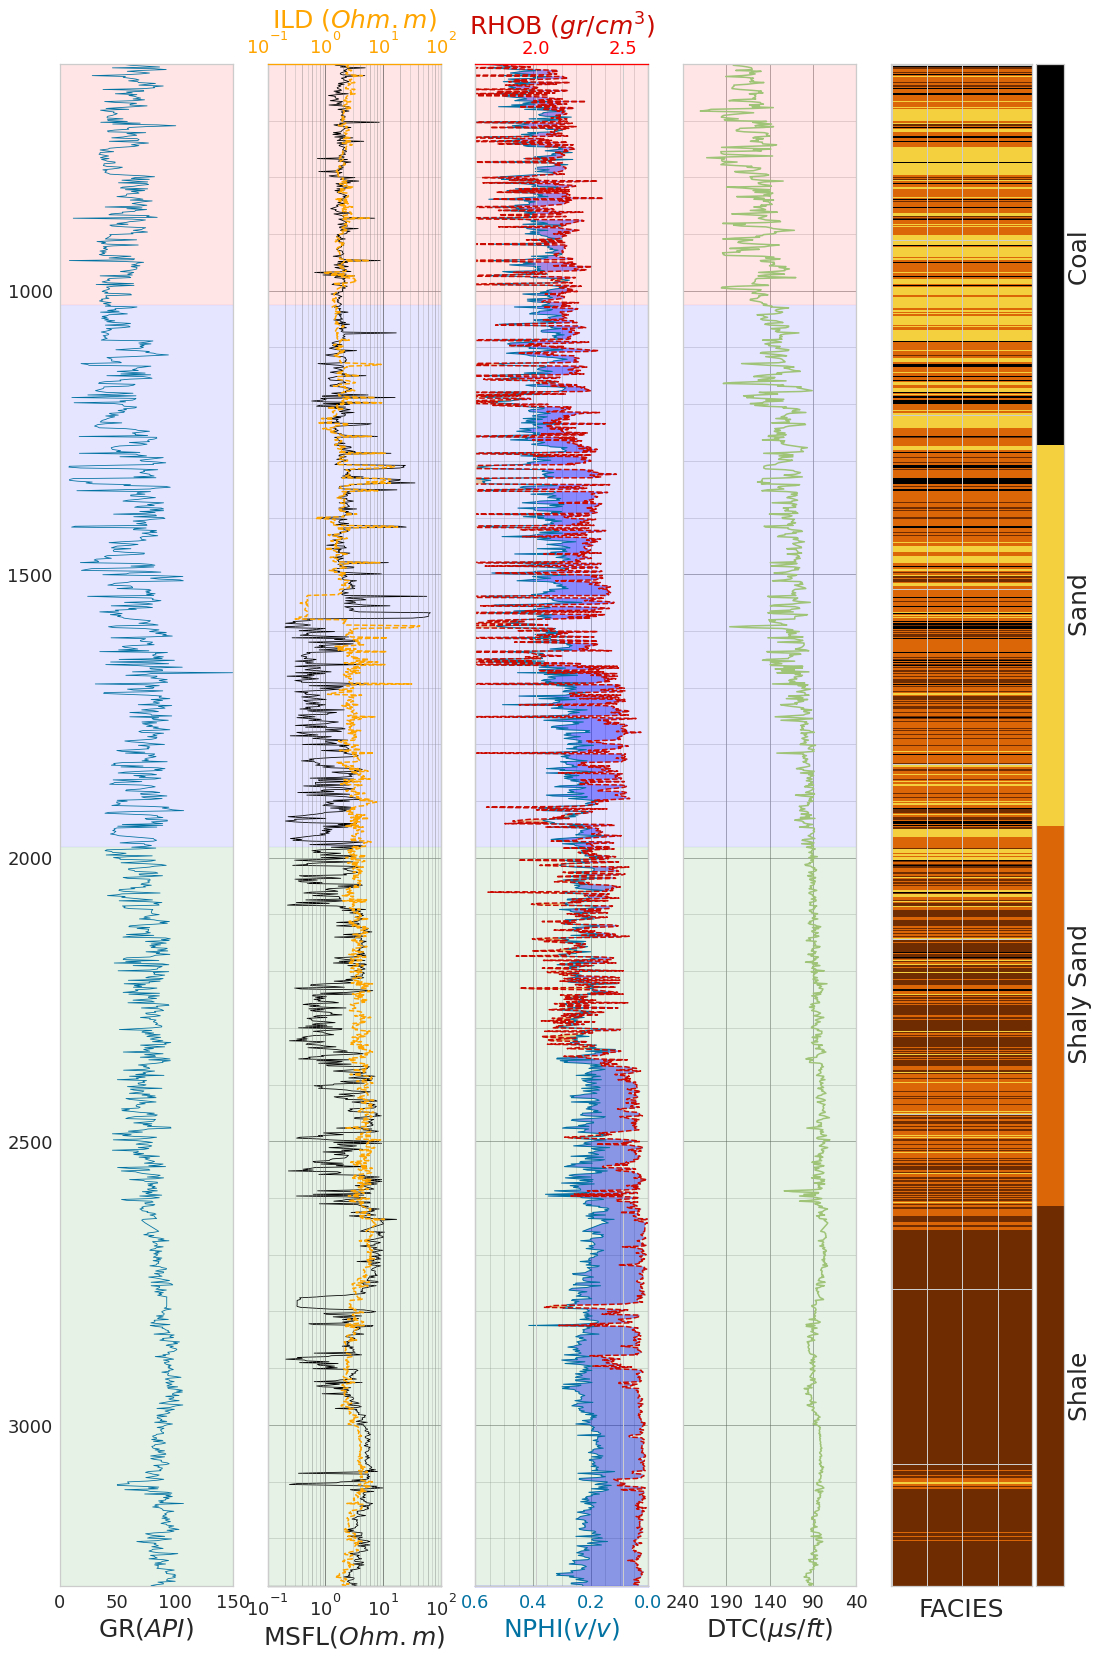

In [14]:
#Training log visualization
logVisual(dfTrain,10, facies_colors, formations_omnicron)
plt.savefig('OmnicronFull.png', dpi = 800)

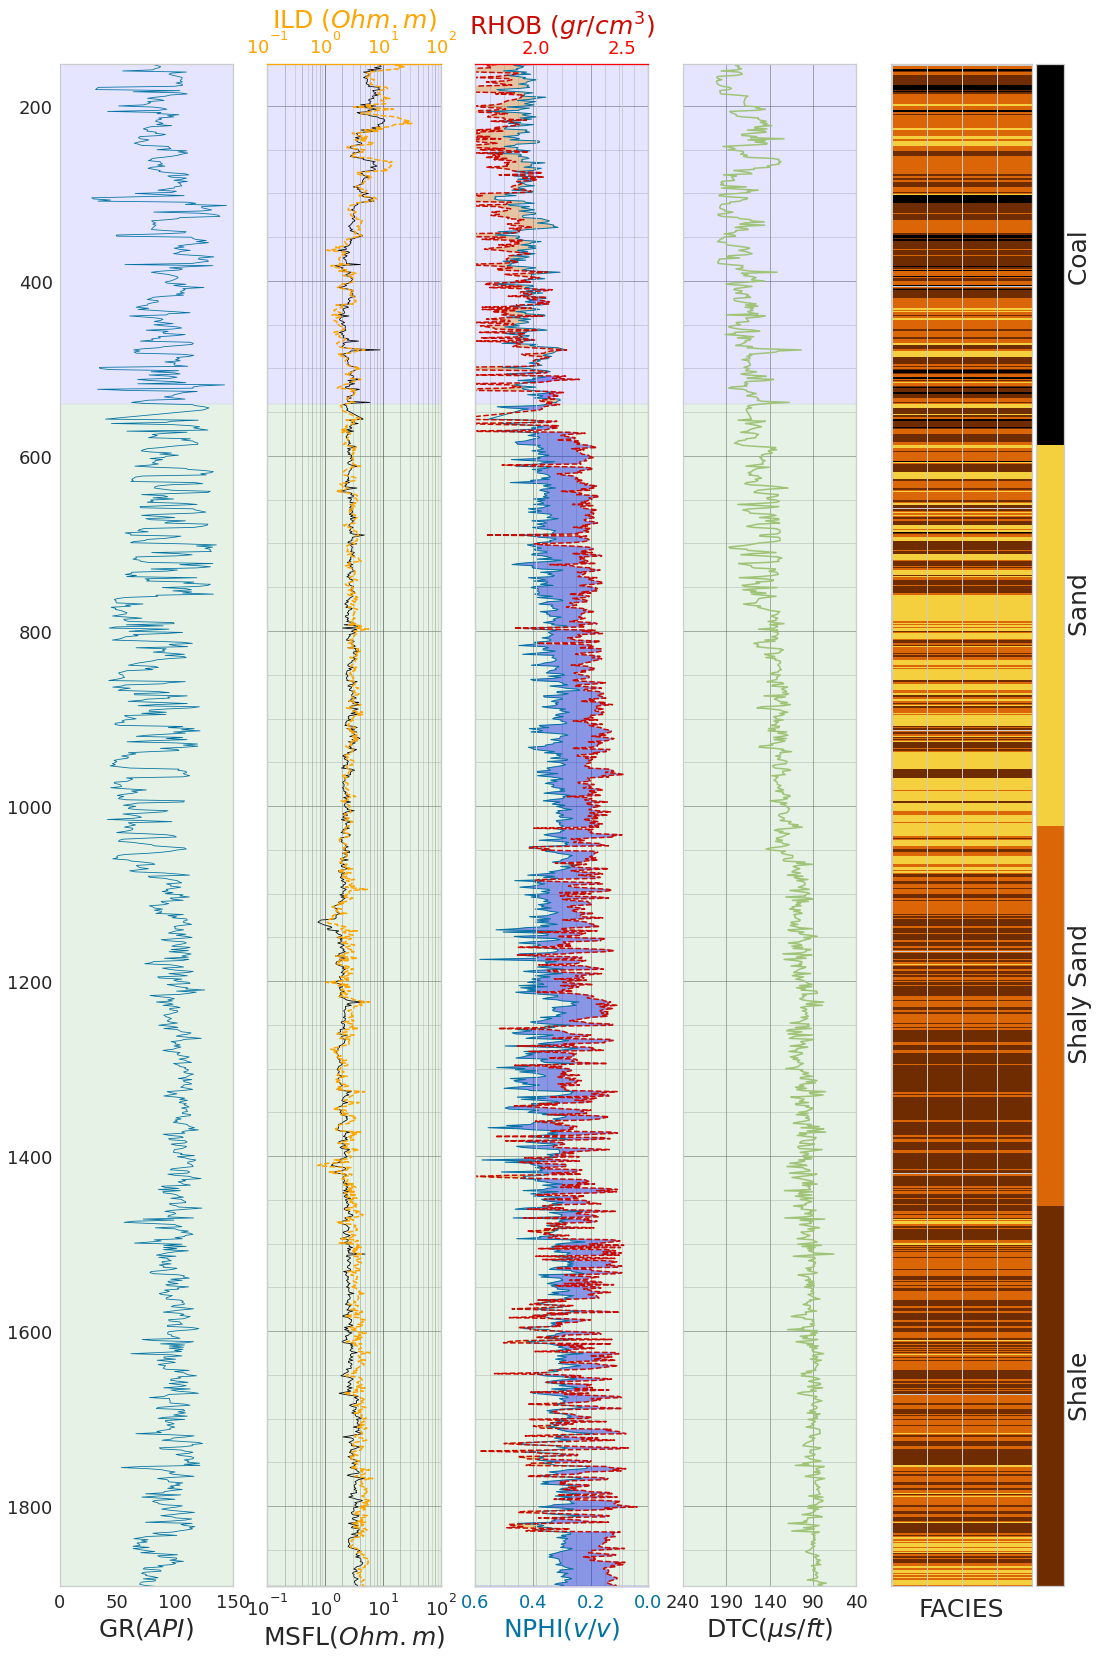

In [11]:
#Testing log visualization
logVisual(dfTest,10, facies_colors, formations_kay)
plt.savefig('KayFull.png', dpi = 800)

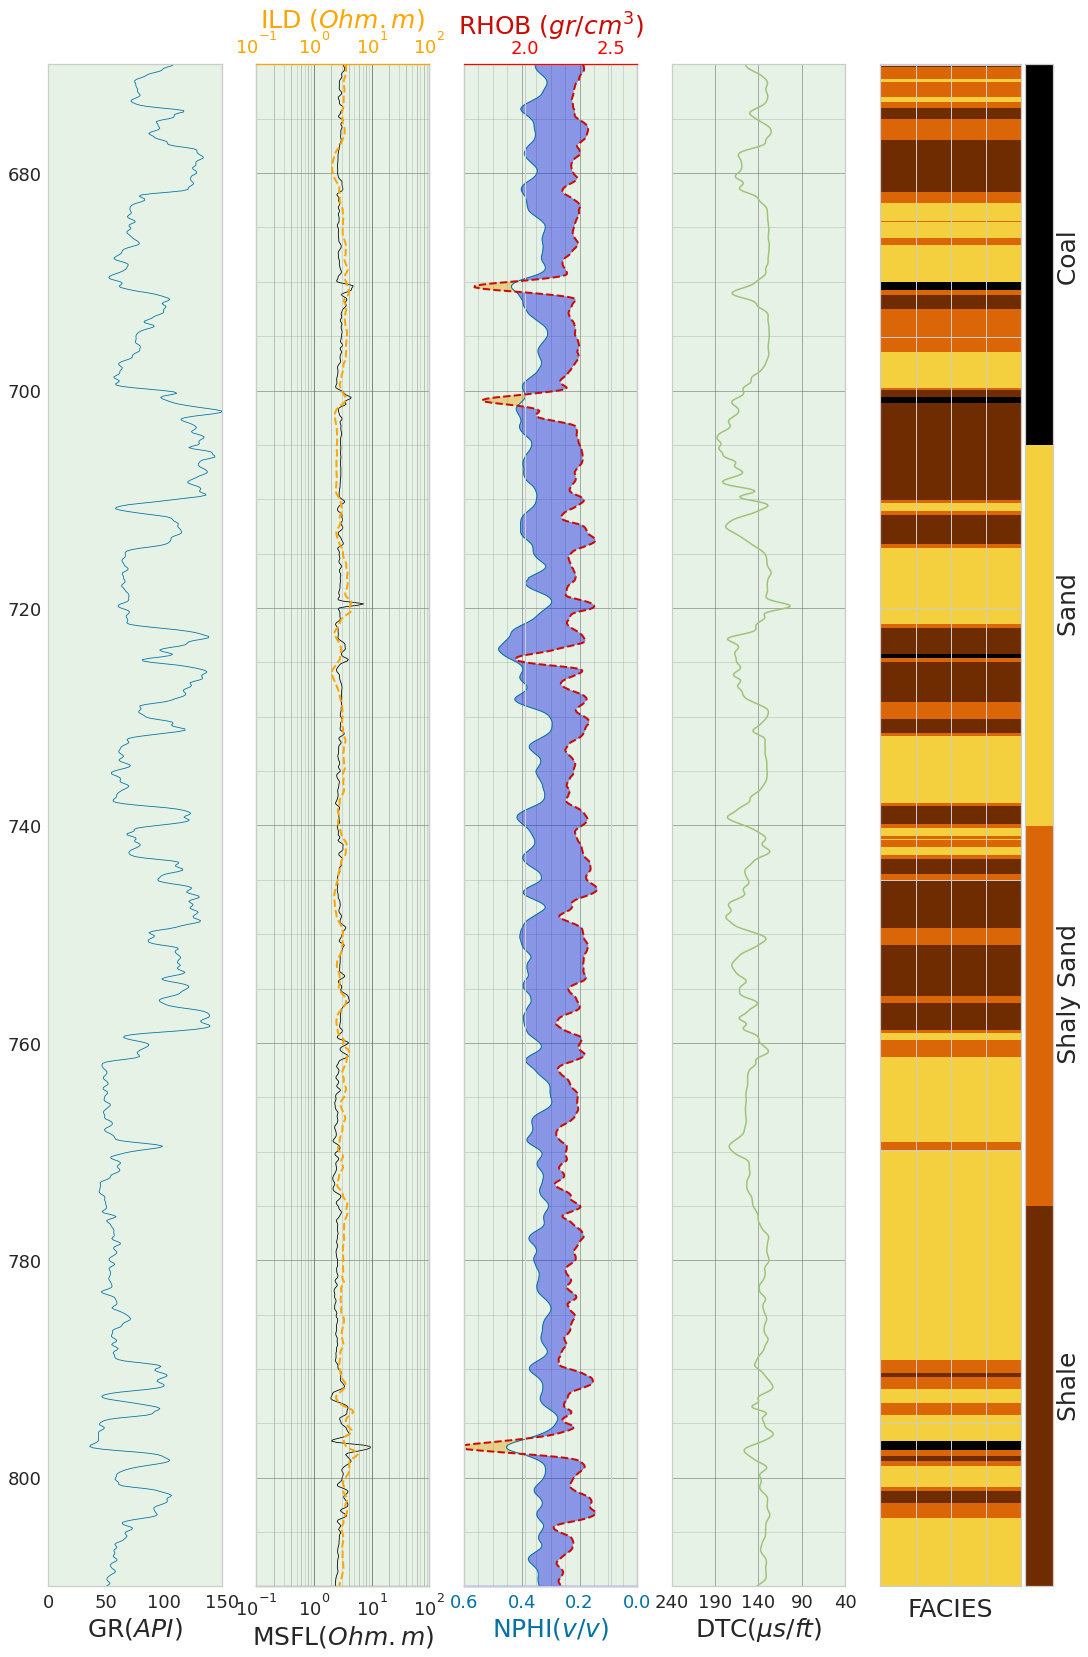

In [12]:
#specific depth
length = dfTest[(dfTest.DEPTH > 670) & (dfTest.DEPTH < 810)]
logVisualSpecific(length, facies_colors, formations_kay)
plt.savefig('KaySpecific.png', dpi = 800)

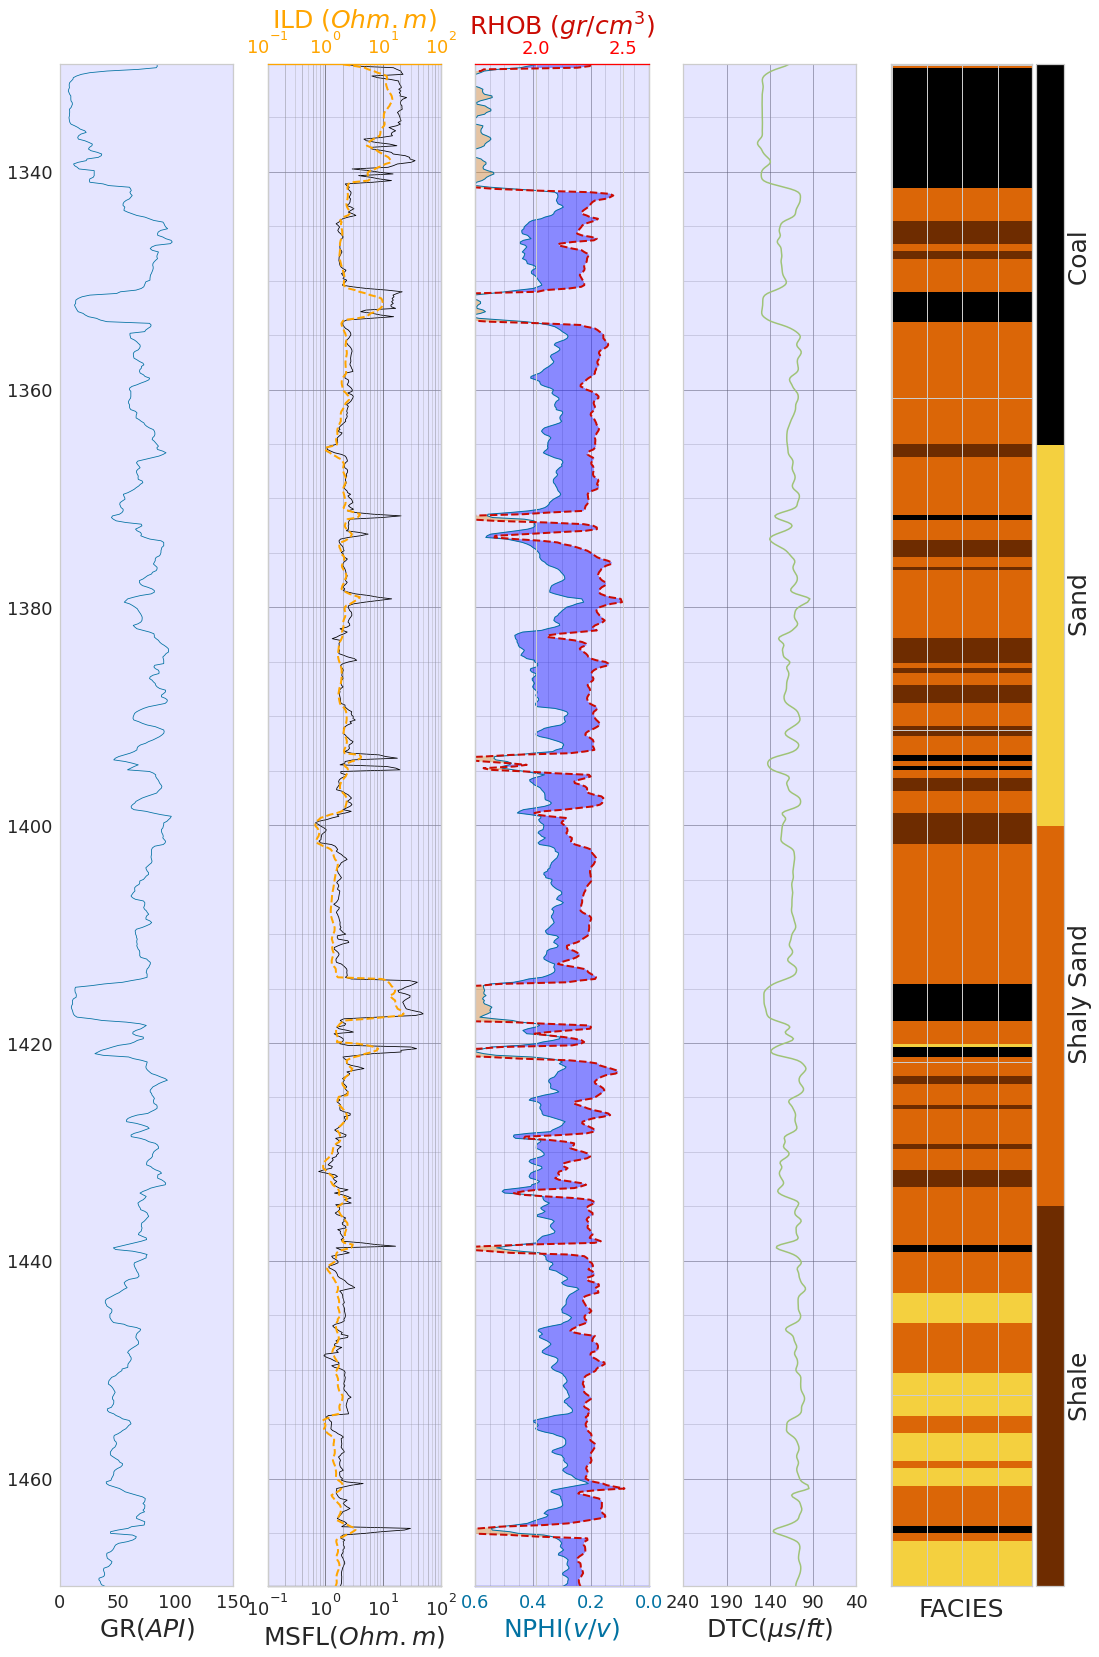

In [13]:
#specific depth
length = dfTrain[(dfTrain.DEPTH > 1330) & (dfTrain.DEPTH < 1470)]
logVisualSpecific(length, facies_colors, formations_omnicron)
plt.savefig('OmniSpecific.png', dpi = 800)

## Machine Learning Implementation

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing all machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from matplotlib.pyplot import figure
from sklearn.metrics import precision_recall_fscore_support

In [16]:
# !pip install xgboost

In [17]:
def stdDataset(df):
    scaler = StandardScaler()
    arr = scaler.fit_transform(df[['DTC', 'GR', 'MSFL', 'ILD', 'NPHI', 'RHOB']])
    df = pd.DataFrame(data=arr, columns=[['DTC', 'GR', 'MSFL', 'ILD', 'NPHI', 'RHOB']])
    return arr, df

In [18]:
arrTrain, dfTrainStd = stdDataset(dfTrain)
arrTest, dfTestStd = stdDataset(dfTest)
y_test2 = dfTest['FACIES'].astype(float)

In [19]:
#Train test split dataset
X_train, X_test, y_train, y_test = train_test_split(dfTrainStd[['DTC', 'GR', 'MSFL', 'ILD', 'NPHI', 'RHOB']], dfTrain['FACIES'].astype(float), test_size=0.2, random_state=10, stratify=dfTrain['FACIES'])

In [20]:
tree_clf = DecisionTreeClassifier(random_state=10)

rnd_clf = RandomForestClassifier(random_state=10)

gbst_clf = GradientBoostingClassifier(random_state=10)

lgst_clf = LogisticRegression(C=100)

knn_clf = KNeighborsClassifier()

svm_clf = SVC(random_state=10)


def evaluationFacies(testData, y_test):
    for clf in (tree_clf, rnd_clf, gbst_clf, lgst_clf, knn_clf, svm_clf):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(testData)
        print('###',clf.__class__.__name__,'###') 
        print('Accuracy : {:.2f} %'.format(accuracy_score(y_test, y_pred)*100))
        print('Precision : ', precision_score(y_test, y_pred, average='weighted'))
        print('Recall   : ', recall_score(y_test, y_pred, average='weighted'))
        print('f1_score : ', f1_score(y_test, y_pred, average='weighted'))    
        print()

In [21]:
evaluationFacies(X_test, y_test)

### DecisionTreeClassifier ###
Accuracy : 98.48 %
Precision :  0.984735771193237
Recall   :  0.9847744900890548
f1_score :  0.9847354121359372

### RandomForestClassifier ###
Accuracy : 98.85 %
Precision :  0.9885590799185374
Recall   :  0.988509049123815
f1_score :  0.9884601060824593

### GradientBoostingClassifier ###
Accuracy : 98.53 %
Precision :  0.9853123330944968
Recall   :  0.9853490376328641
f1_score :  0.9853038635375423

### LogisticRegression ###
Accuracy : 93.22 %
Precision :  0.9320515321364627
Recall   :  0.9322033898305084
f1_score :  0.9320275052173003

### KNeighborsClassifier ###
Accuracy : 96.06 %
Precision :  0.9606114373103085
Recall   :  0.9606434932490664
f1_score :  0.9605250409659876

### SVC ###
Accuracy : 95.89 %
Precision :  0.9589254648078412
Recall   :  0.9589198506176386
f1_score :  0.9587881460561236



In [22]:
evaluationFacies(dfTestStd, y_test2)

### DecisionTreeClassifier ###
Accuracy : 72.91 %
Precision :  0.7955340941608697
Recall   :  0.729099912612875
f1_score :  0.7484422365907144

### RandomForestClassifier ###
Accuracy : 87.49 %
Precision :  0.8958854322679628
Recall   :  0.8748907660937956
f1_score :  0.8812769308893877

### GradientBoostingClassifier ###
Accuracy : 87.04 %
Precision :  0.8934596271521636
Recall   :  0.8704485872414798
f1_score :  0.878384068087882

### LogisticRegression ###
Accuracy : 61.44 %
Precision :  0.678000793152929
Recall   :  0.6144043110981648
f1_score :  0.6252008096250528

### KNeighborsClassifier ###
Accuracy : 82.68 %
Precision :  0.8531489201621594
Recall   :  0.8268278473638218
f1_score :  0.8332485177356025

### SVC ###
Accuracy : 82.73 %
Precision :  0.873188180783582
Recall   :  0.8272647829886397
f1_score :  0.8433375354834985



## Statistical Evaluation

In [23]:
predRes_tree = tree_clf.predict(dfTestStd)
predRes_rnd = rnd_clf.predict(dfTestStd)
predRes_gbst = gbst_clf.predict(dfTestStd)
predRes_lgst = lgst_clf.predict(dfTestStd)
predRes_knn = knn_clf.predict(dfTestStd)
predRes_svm = svm_clf.predict(dfTestStd)


In [24]:
def evalMethod(method):
    # Accuracy boxplot draw

    df_pred = pd.DataFrame({
            'Decision Tree': method(y_test2, predRes_tree, average=None)*100,
            'Random Forest': method(y_test2, predRes_rnd, average=None)*100,
            'Gradient Boosting':method(y_test2, predRes_gbst, average=None)*100,
            'Logistic Regression' : method(y_test2, predRes_lgst, average=None)*100, 
            'KNearest Neighbor' : method(y_test2, predRes_knn, average=None)*100, 
            'Support Vector Machine' : method(y_test2, predRes_svm, average=None)*100
            })
    plt.figure(figsize=(20,8))

    pred_box = sns.boxplot(data=df_pred, palette="Set2", color='white', width=.5, fliersize=5)
    pred_box.set_ylabel("Percentage (%)")

    # iterate over boxes
    for i,box in enumerate(pred_box.artists):
        box.set_edgecolor('red')
        box.set_facecolor('white')


    #adjust limit of graph
    pred_box.set(ylim=(0, 100))

    #size of tick labels
    pred_box.tick_params(labelsize=20)

    #adjust title size
    if method == precision_score:
        plt.ylabel( 'Precision (%)', fontsize=20)
    elif method == recall_score:
        plt.ylabel( 'Recall (%)', fontsize=20)
    elif method == f1_score:
        plt.ylabel( 'F1 Score (%)', fontsize=20)
    else:
        plt.ylabel( 'Percentage (%)', fontsize=20)


    #for complete figure
    plt.tight_layout()

    #Setting ticks
    plt.grid(axis='y', b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)

    plt.minorticks_on()
    plt.grid(axis='y', b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


    plt.setp(pred_box.spines.values(), color='black', linewidth=3)


    #plt.savefig("WELL_Kay_Precision.png", dpi=400)

<function precision_score at 0x7f4b4e5aa0d0>

<function recall_score at 0x7f4b4e5aa268>

<function f1_score at 0x7f4b4e5a49d8>



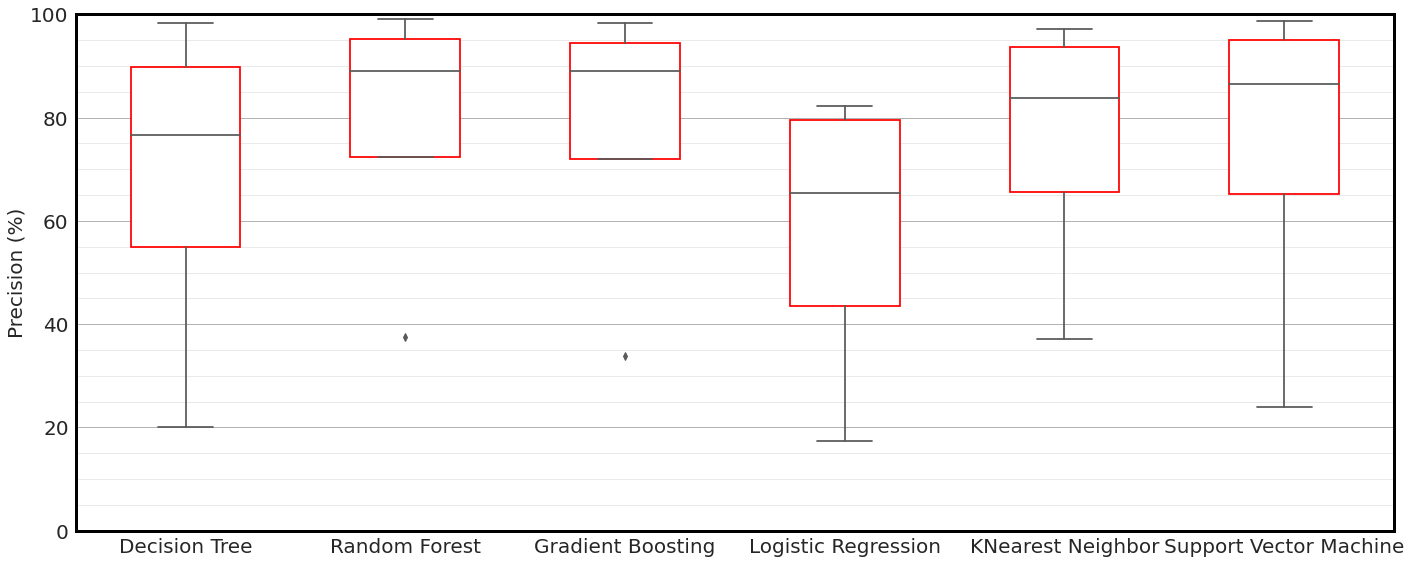

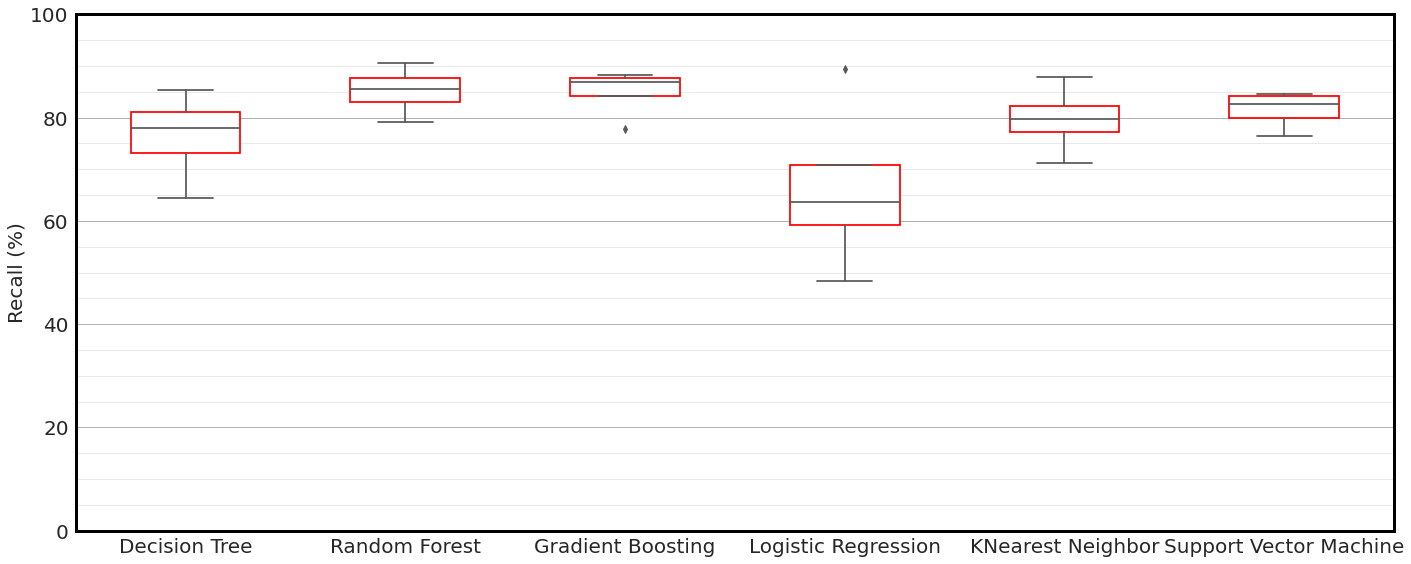

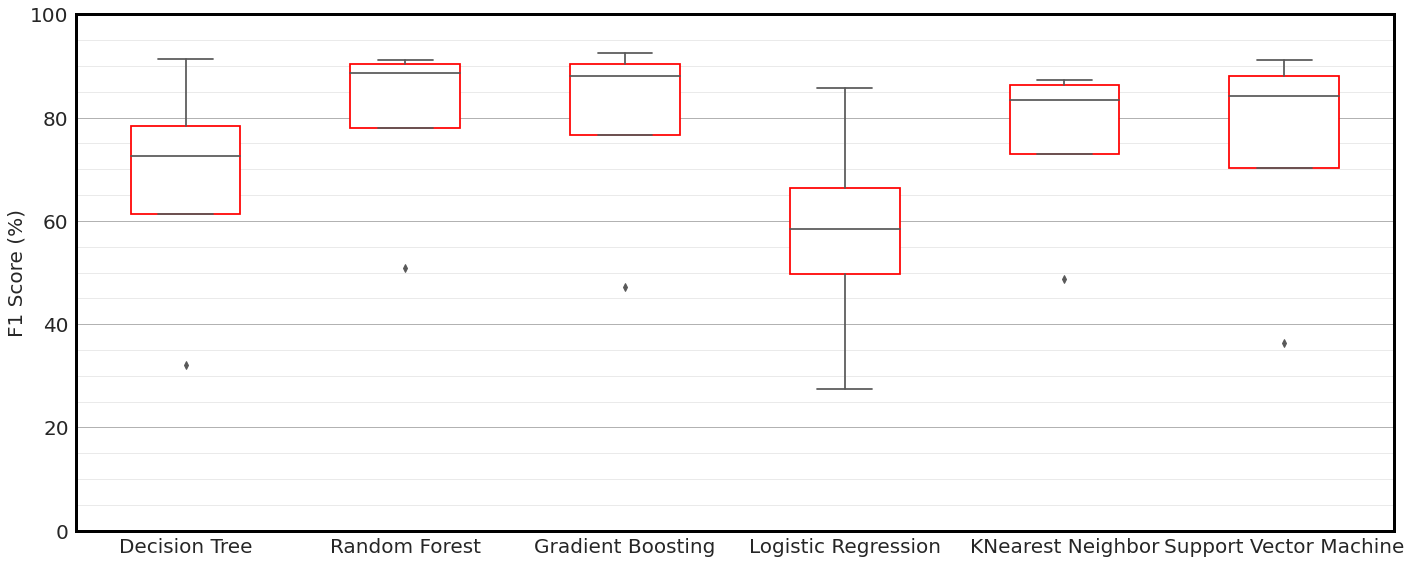

In [25]:
for i in (precision_score, recall_score, f1_score):
    print(i)
    evalMethod(i)
    print()

## Advance Performance Evaluation

In [26]:
#obtain class labels for future use 
# classes = y_test.value_counts().index.tolist()
classes = ['Shale', 'Shaly Sand', 'Sand', 'Coal']
facies_colors = ['#6E2C00', '#db6607', '#F4D03F', '#000000']

In [27]:
def ROC_AUC(model):
    sns.set_style("ticks")
    #setting color
    sns.set_palette(facies_colors)

    plt.figure(figsize=(12,8))
    #size of tick labels

    plt.title("ROC Curve and AUC", fontsize=18)
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    #Setting ticks
    plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)

    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    mpl.rcParams['axes.linewidth'] = 1 #set the value globally


    visualizer = ROCAUC(model, classes=classes, support=True, micro=False, title=" ", macro=False )
    visualizer.fit(X_train, y_train)        
    visualizer.score(arrTest, y_test2)
    plt.legend(loc='lower right', fontsize=20)             
    
def precisionRecall(model):
    sns.set_style("white")

    plt.figure(figsize=(12,8))
    #size of tick labels

    plt.title("ROC Curve and AUC", fontsize=18)
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    #Setting ticks
    plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.5)
    plt.minorticks_on()
    #plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    mpl.rcParams['axes.linewidth'] = 1 #set the value globally


    visualizer = PrecisionRecallCurve(rnd_clf, classes=classes, iso_f1_curves=True, per_class=True,  micro=False, title=" ", ap_score=False)
    visualizer.fit(X_train, y_train)        
    visualizer.score(arrTest, y_test2)
    # plt.legend(loc='lower right', fontsize=20)

def classPredictionError(model):
    sns.set_style("white")


    plt.figure(figsize=(8,8))
    #size of tick labels

    plt.xlabel("Number of Predicted Class", fontsize=16)
    plt.ylabel("Actual Class", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    #Setting ticks
    plt.grid(b=True,axis='y', which='major', color='#666666', linestyle='--', alpha = 0.5)
    plt.minorticks_on()
    plt.grid(b=True,axis='y', which='minor', color='#999999', linestyle='-', alpha=0.2)

    mpl.rcParams['axes.linewidth'] = 1 #set the value globally


    visualizer = ClassPredictionError(model, classes=classes, title=" " )
    visualizer.fit(X_train, y_train)        
    visualizer.score(arrTest, y_test2)
    
    
def confusionMatrixPercent(model):
    sns.set_style("white")

    plt.figure(figsize=(12,8))
    #size of tick labels

    plt.xlabel("Number of Predicted Class", fontsize=16)
    plt.ylabel("Actual Class", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    #Setting ticks
    plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.5)
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    mpl.rcParams['axes.linewidth'] = 1 #set the value globally


    visualizer = ConfusionMatrix(model, classes=classes, title=" " , percent=True, cmap='Greys',fontsize=22)
    visualizer.fit(X_train, y_train)    
    visualizer.score(arrTest, y_test2)
    
def confusionMatrix(model):
    sns.set_style("white")

    plt.figure(figsize=(12,8))
    #size of tick labels

    plt.xlabel("Number of Predicted Class", fontsize=16)
    plt.ylabel("Actual Class", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    #Setting ticks
    plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.5)
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    mpl.rcParams['axes.linewidth'] = 1 #set the value globally


    visualizer = ConfusionMatrix(model, classes=classes, title=" " , percent=False, cmap='Greys',fontsize=22)
    visualizer.fit(X_train, y_train)    
    visualizer.score(arrTest, y_test2)


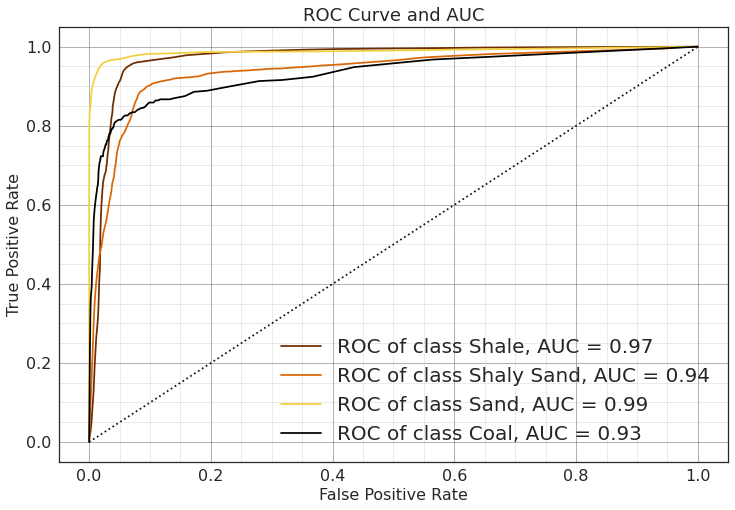

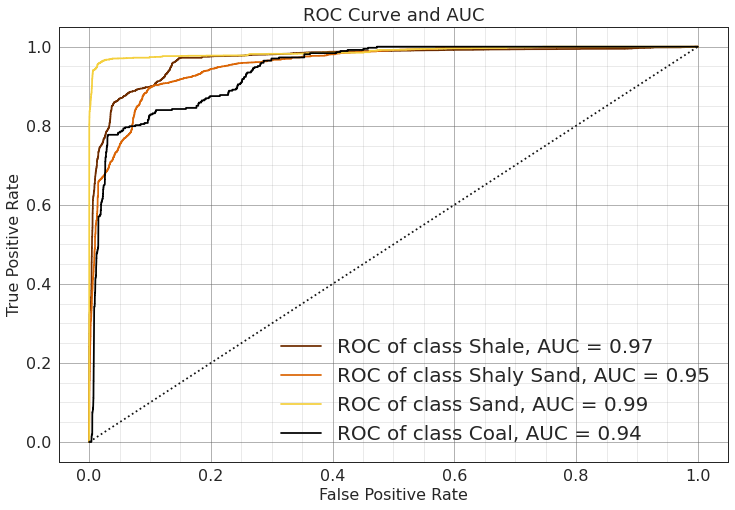

In [28]:
ROC_AUC(rnd_clf)
ROC_AUC(gbst_clf)

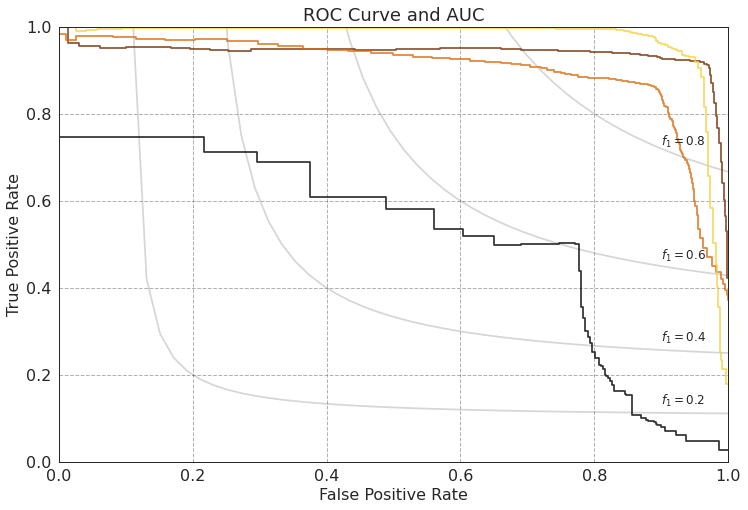

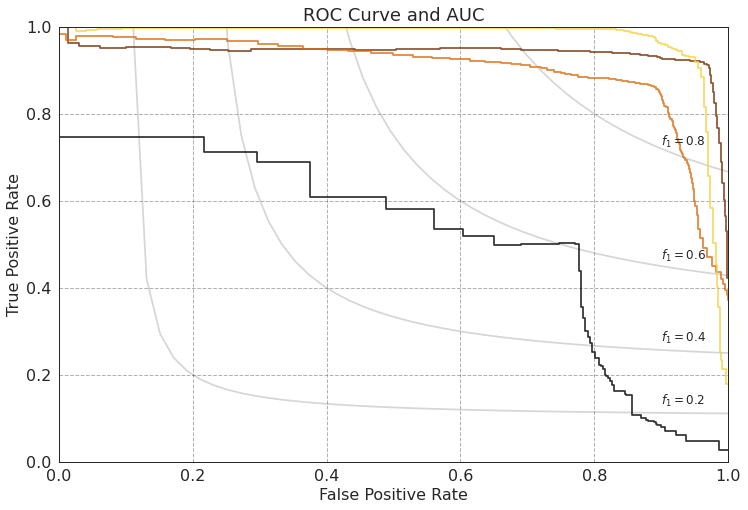

In [29]:
precisionRecall(rnd_clf)
precisionRecall(gbst_clf)

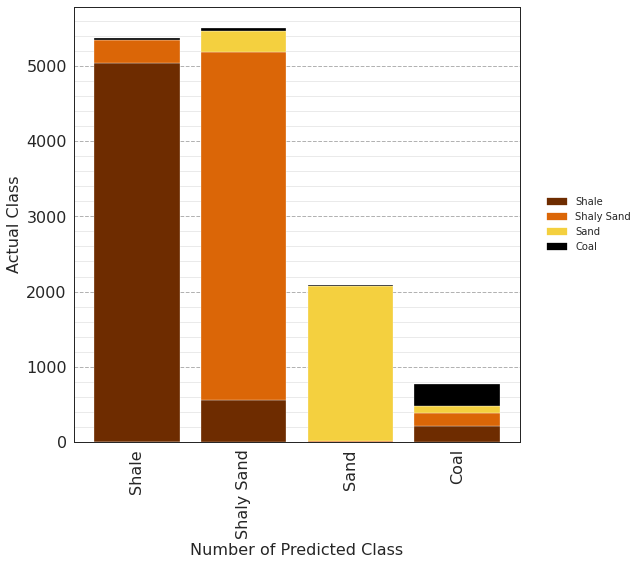

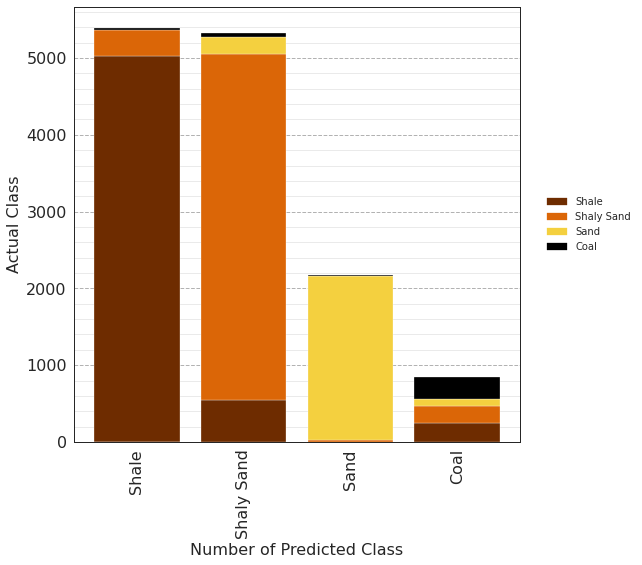

In [30]:
classPredictionError(rnd_clf)
classPredictionError(gbst_clf)

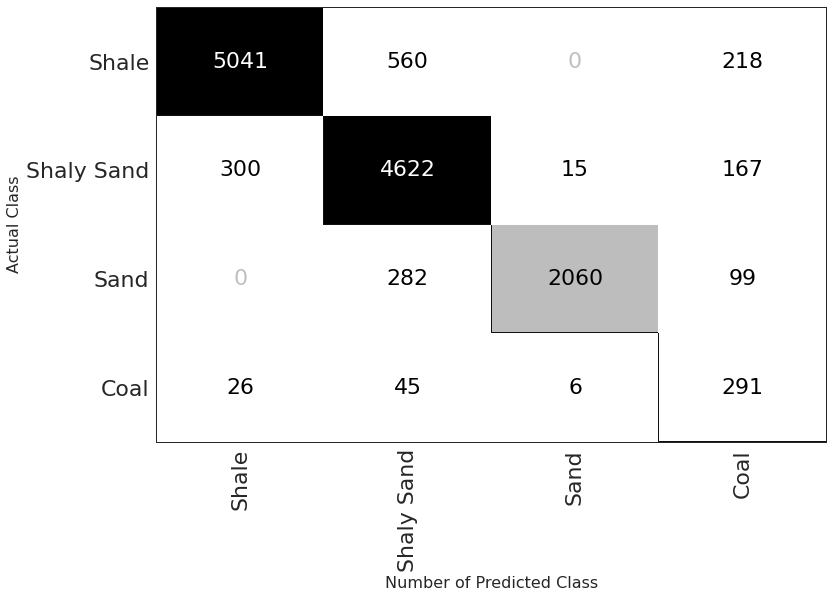

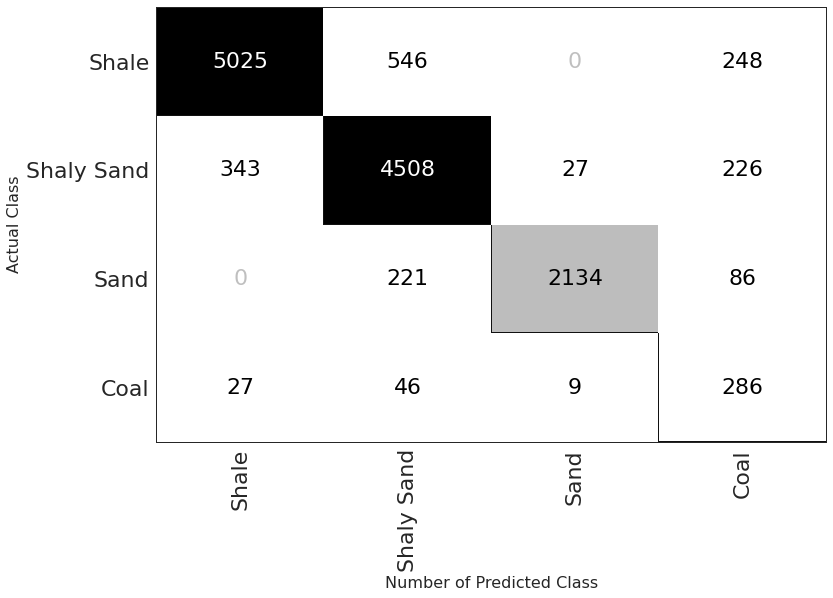

In [31]:
confusionMatrix(rnd_clf)
confusionMatrix(gbst_clf)

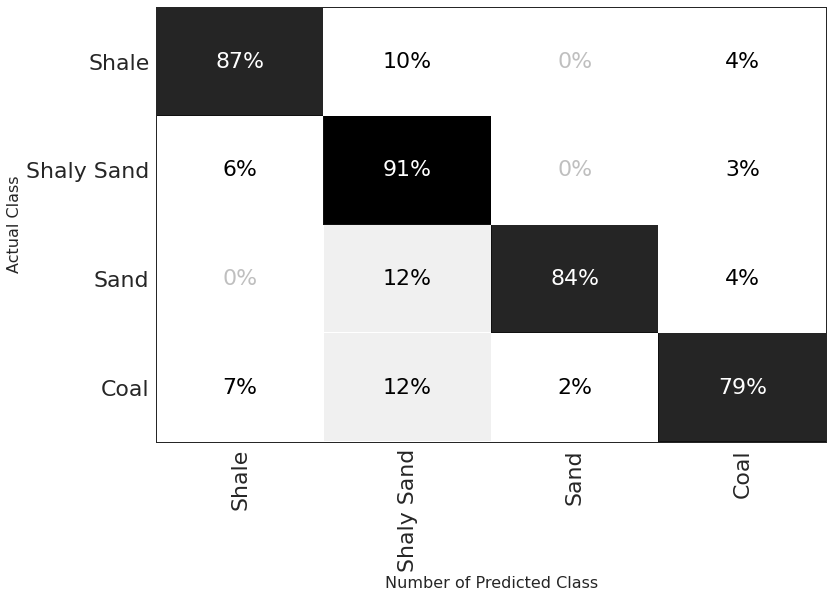

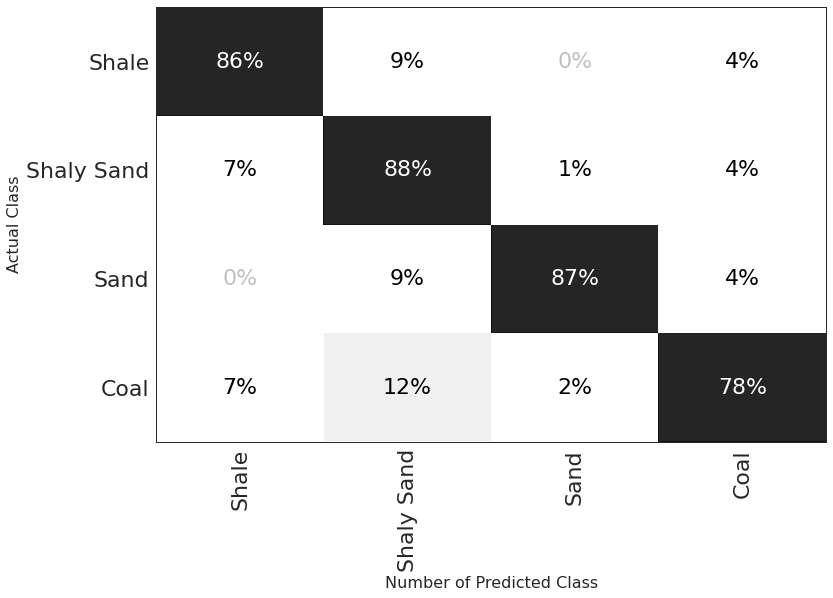

In [32]:
confusionMatrixPercent(rnd_clf)
confusionMatrixPercent(gbst_clf)

## Geological Interpretation result

In [34]:
dfPredResult ={
               'DEPTH': dfTest['DEPTH'],
               'FACIES ORIGINAL' : dfTest['FACIES'],      
               'RANDOM FOREST': predRes_rnd,
               'GRADIENT BOOSTING': predRes_gbst
              }

dfPredResult = pd.DataFrame(
                            dfPredResult, 
                            columns = ['DEPTH','FACIES ORIGINAL','RANDOM FOREST','GRADIENT BOOSTING'] 
                            )

In [35]:
def compare_facies_plot(logs, sampling, facies_colors):
    #sampling
    logs = logs.iloc[::sampling, :]
    
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='DEPTH')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.DEPTH.min(); zbot=logs.DEPTH.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['FACIES ORIGINAL'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs['RANDOM FOREST'].values,1), 100, 1)
    cluster3 = np.repeat(np.expand_dims(logs['GRADIENT BOOSTING'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 14))
   
    im1 = ax[0].imshow(cluster1, interpolation='none', aspect='auto', cmap=cmap_facies,vmin=1,vmax=4)
    im2 = ax[1].imshow(cluster2, interpolation='none', aspect='auto', cmap=cmap_facies,vmin=1,vmax=4)
    im3 = ax[2].imshow(cluster3, interpolation='none', aspect='auto', cmap=cmap_facies,vmin=1,vmax=4)
    
    divider = make_axes_locatable(ax[2])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im3, cax=cax)
    cbar.set_label((6*'    ').join(['Shale', 'Shaly Sand', 'Sandstone', 'Coal']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].tick_params(axis='x', bottom = False)
        # Hide grid lines
        ax[i].grid(False)
        # Hide axes ticks
        ax[i].set_xticks([])
        #ax[i].set_yticks([])
        #ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel('FACIES ORIGINAL', fontsize =14)
    ax[1].set_xlabel('RANDOM FOREST', fontsize = 14)
    ax[2].set_xlabel('GRADIENT BOOSTING', fontsize = 14)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([])

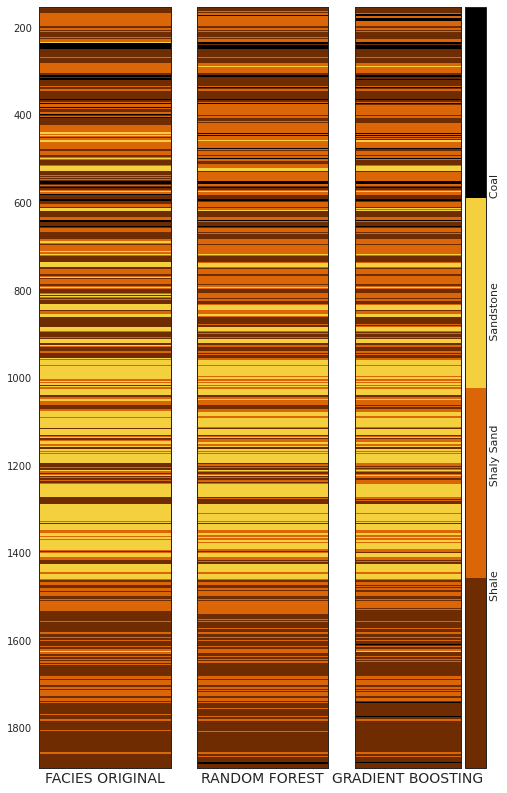

In [36]:
compare_facies_plot(dfPredResult, 5, facies_colors)
#plt.savefig("well comparison.png", dpi=400)

In [37]:
plotdata = pd.DataFrame(
    {
    "Shale":[
        len(dfPredResult[dfPredResult['FACIES ORIGINAL']==1].value_counts()), 
        len(dfPredResult[dfPredResult['RANDOM FOREST']==1].value_counts()), 
        len(dfPredResult[dfPredResult['GRADIENT BOOSTING']==1].value_counts())
    ],
    "Shaly Sand":[
        len(dfPredResult[dfPredResult['FACIES ORIGINAL']==2].value_counts()), 
        len(dfPredResult[dfPredResult['RANDOM FOREST']==2].value_counts()), 
        len(dfPredResult[dfPredResult['GRADIENT BOOSTING']==2].value_counts())
    ],
    "Sandstone":[
        len(dfPredResult[dfPredResult['FACIES ORIGINAL']==3].value_counts()), 
        len(dfPredResult[dfPredResult['RANDOM FOREST']==3].value_counts()), 
        len(dfPredResult[dfPredResult['GRADIENT BOOSTING']==3].value_counts())
    ],
     "Coal":[
         len(dfPredResult[dfPredResult['FACIES ORIGINAL']==4].value_counts()), 
         len(dfPredResult[dfPredResult['RANDOM FOREST']==4].value_counts()), 
         len(dfPredResult[dfPredResult['GRADIENT BOOSTING']==4].value_counts())]
    }, 
    index=["ORIG.", "RF", "GB"]
    )

def plotDist(plotdata):
    ax = plotdata.plot(kind="bar", color=facies_colors, figsize=(15,8) )


    #adjust title size
    plt.ylabel('Facies Distribution', fontsize=25)

    #size of tick labels
    plt.rcParams.update({'font.size': 15})


    #for complete figure
    plt.tight_layout()

    #Setting ticks
    plt.grid(axis='y', b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)

    plt.minorticks_on()
    plt.grid(axis='y', b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


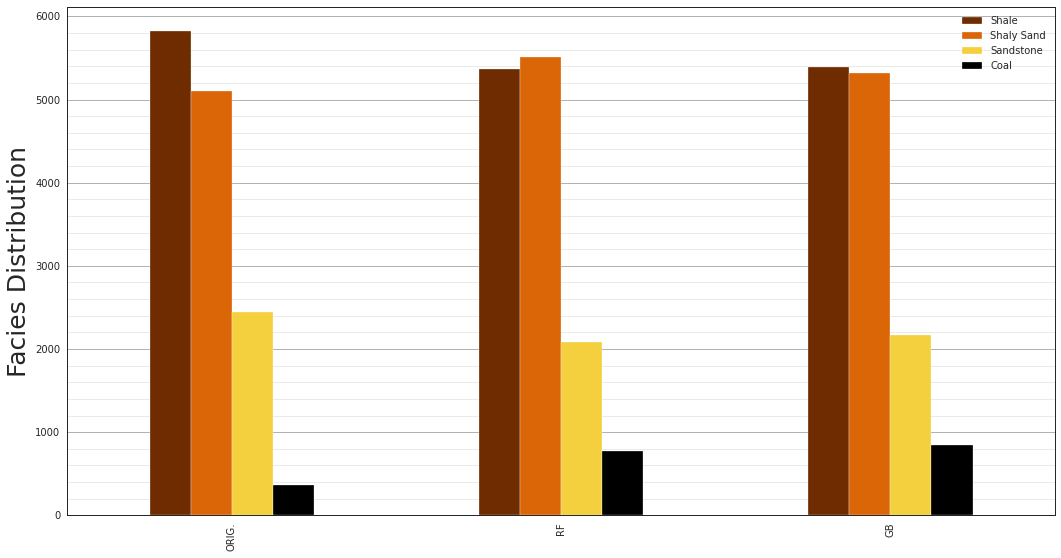

In [38]:
plotDist(plotdata)

## DTC vs GR

In [39]:
def sonicGR(datafacies, facieslabel, data):
    ax = sns.relplot(x="DTC", y="GR", hue=datafacies[facieslabel], data=data, palette=facies_colors, s= 7, legend = False);

    #border close
    sns.despine(top=False,    right=False,    left=False,    bottom=False)

    #adjust limit of graph
    ax.set(ylim=(20, 160))
    ax.set(xlim=(220, 60))

    #size of tick labels
    plt.rcParams.update({'font.size': 15})

    #adjust title size
    plt.xlabel('DTC ($\u03BCs/ft$)', fontsize=25)
    plt.ylabel('GR ($API$)', fontsize=25)

    #adjust figure size
    ax.fig.set_figwidth(16)
    ax.fig.set_figheight(6)


    #for complete figure
    plt.tight_layout()

    #Setting ticks
    plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)

    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

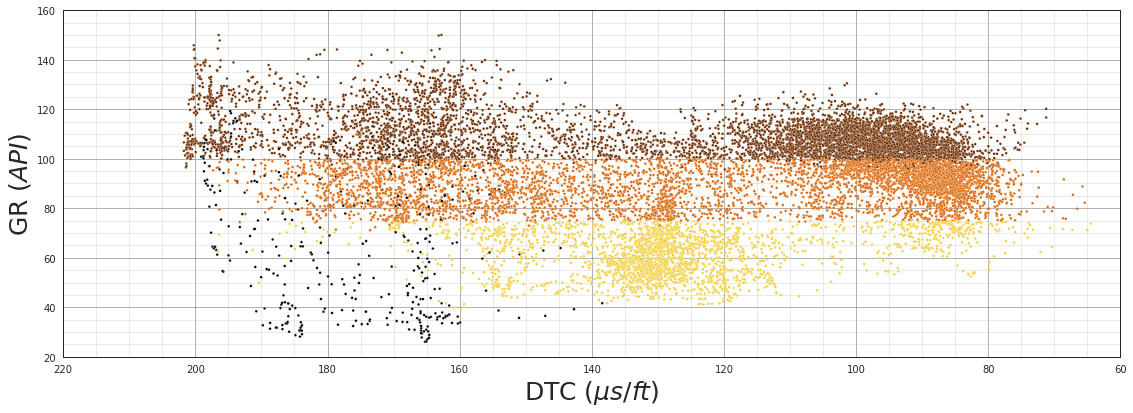

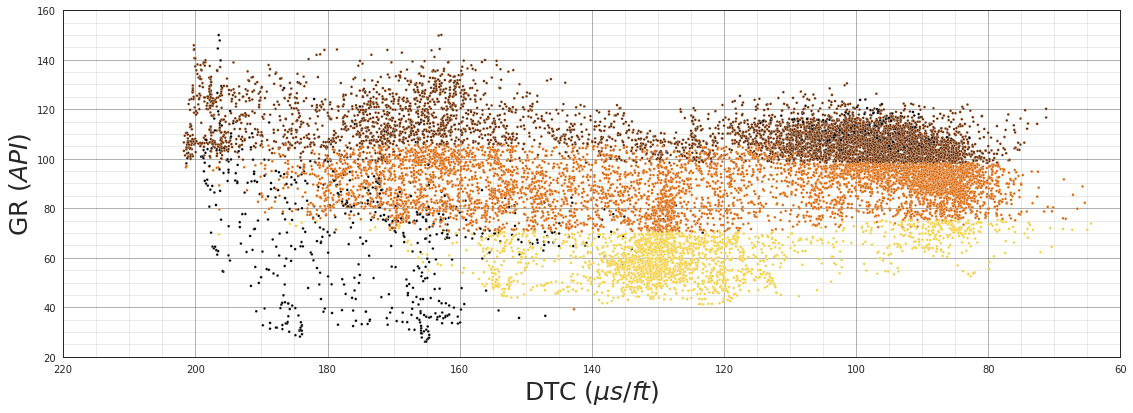

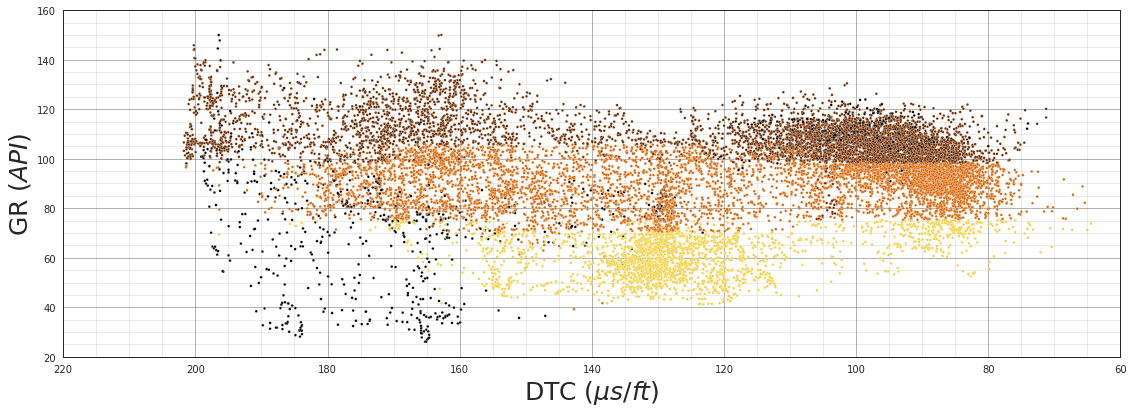

In [40]:
sonicGR(dfPredResult, 'FACIES ORIGINAL', dfTest)
sonicGR(dfPredResult, 'RANDOM FOREST', dfTest)
sonicGR(dfPredResult, 'GRADIENT BOOSTING', dfTest)

## DTC vs RHOB

In [41]:
def sonicRHOB(datafacies, facieslabel, data):  
    ax = sns.relplot(x="DTC", y="RHOB",  hue=datafacies[facieslabel], data=data, palette=facies_colors, s= 7, legend = False);

    #border close
    sns.despine(top=False,    right=False,    left=False,    bottom=False)

    #adjust limit of graph
    ax.set(ylim=(1.4, 2.8))
    ax.set(xlim=(220, 60))

    #size of tick labels
    plt.rcParams.update({'font.size': 15})

    #adjust title size
    plt.xlabel('DTC ($\u03BCs/ft$)', fontsize=25)
    plt.ylabel('RHOB ($gr/cm^3$)', fontsize=25)

    #adjust figure size
    ax.fig.set_figwidth(16)
    ax.fig.set_figheight(6)

    #for complete figure
    plt.tight_layout()

    #Setting ticks
    plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)

    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

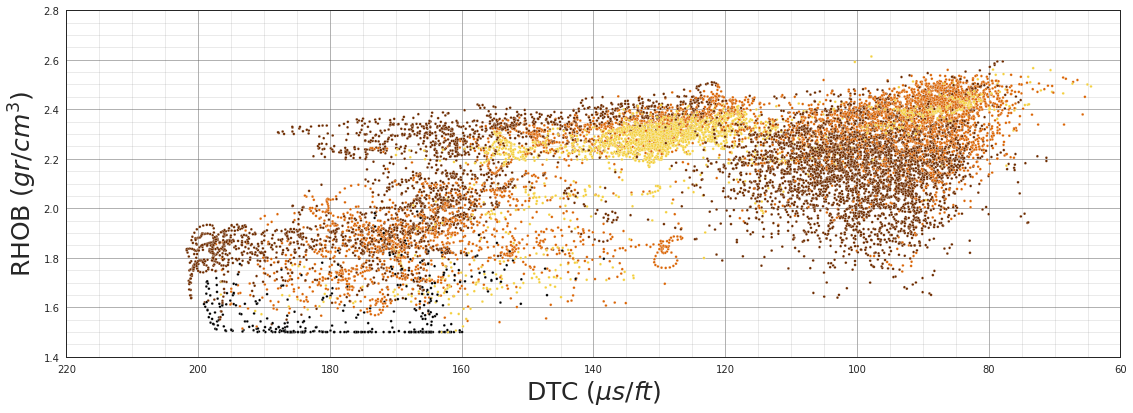

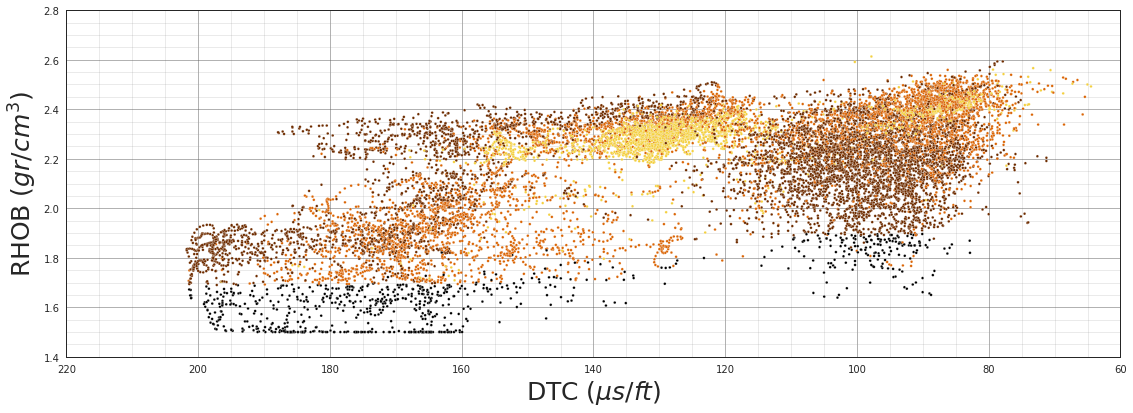

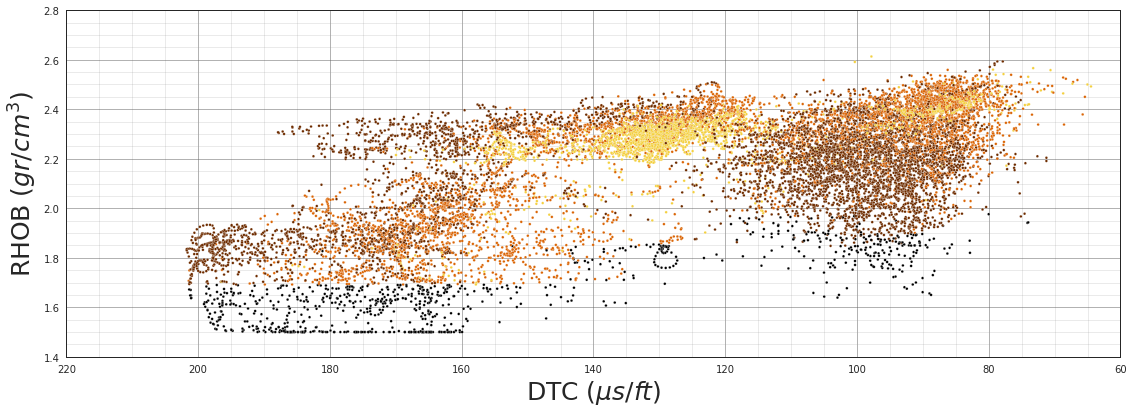

In [42]:
sonicRHOB(dfPredResult, 'FACIES ORIGINAL', dfTest)
sonicRHOB(dfPredResult, 'RANDOM FOREST', dfTest)
sonicRHOB(dfPredResult, 'GRADIENT BOOSTING', dfTest)

## RHOB VS NPHI

In [43]:
def rhobNPHI(datafacies, facieslabel, data):
    ax = sns.relplot(x="RHOB", y="NPHI", hue=datafacies[facieslabel], data=data, palette = facies_colors, s= 7, legend = False);

    #border close
    sns.despine(top=False,    right=False,    left=False,    bottom=False)

    #adjust limit of graph
    ax.set(ylim=(0.7, 0.1))
    ax.set(xlim=(1.4, 2.8))

    #size of tick labels
    plt.rcParams.update({'font.size': 15})

    #adjust title size
    plt.xlabel('RHOB ($gr/cm^3$)', fontsize=25)
    plt.ylabel('NPHI ($v/v$)', fontsize=25)

    #adjust figure size
    ax.fig.set_figwidth(16)
    ax.fig.set_figheight(6)

    #for complete figure
    plt.tight_layout()

    #Setting ticks
    plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)

    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

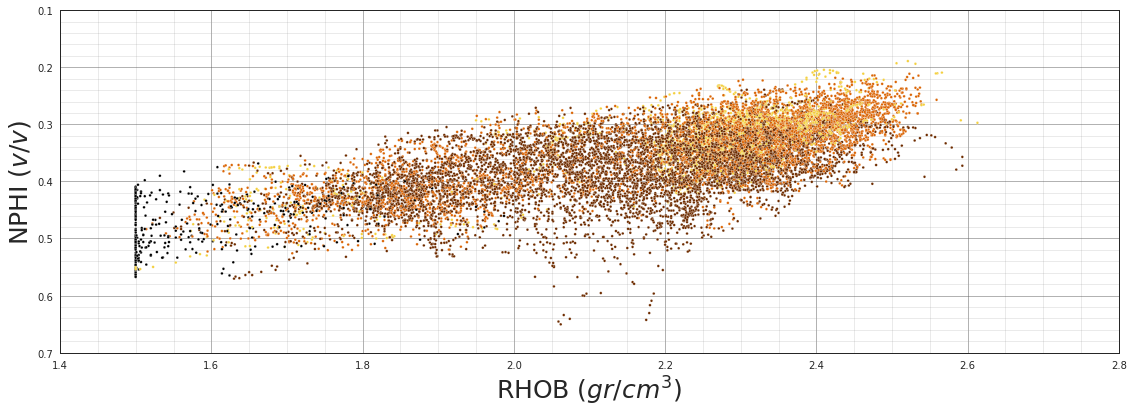

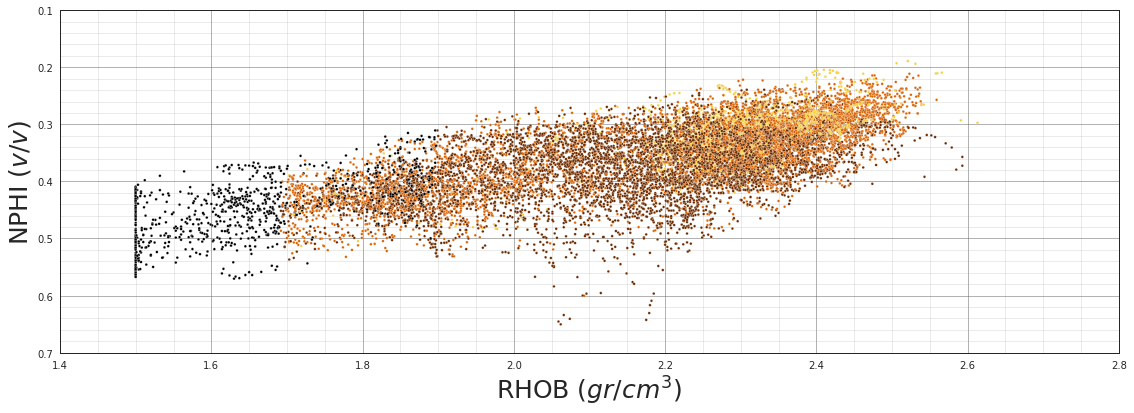

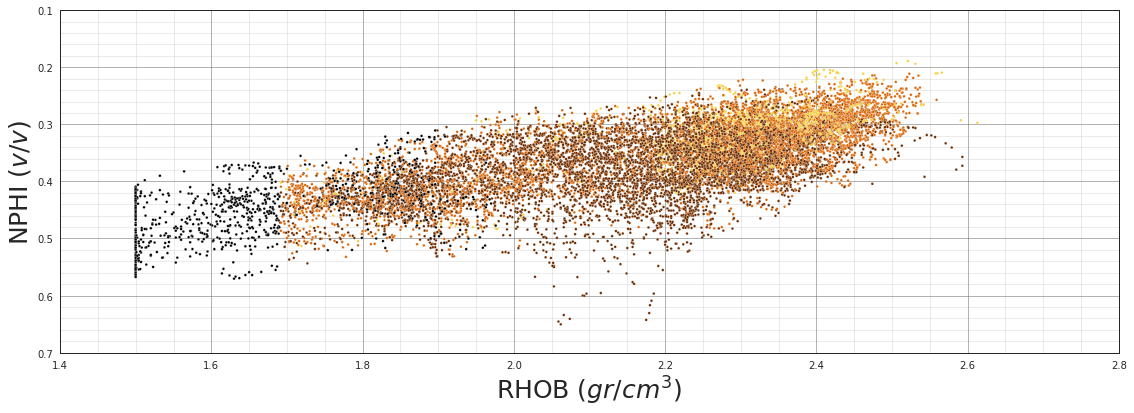

In [44]:
rhobNPHI(dfPredResult, 'FACIES ORIGINAL', dfTest)
rhobNPHI(dfPredResult, 'RANDOM FOREST', dfTest)
rhobNPHI(dfPredResult, 'GRADIENT BOOSTING', dfTest)

# Rock Physics analysis

In [45]:
dfRP = pd.read_csv('rockPhysics.csv')
dfRockPhys = dfRP.dropna(how='any')
dfRockPhys = dfRockPhys[(dfRockPhys.FACIES != 0) & (dfRockPhys.FACIES != 5)]
dfRockPhys = dfRockPhys[(dfRockPhys.DEPTH > 150) & (dfRockPhys.DEPTH < 1892.1)]
dfRockPhys['VP'] = 1000000 / dfRockPhys['DTC']
dfRockPhys = dfRockPhys[['DEPTH','PHIT', 'VP_TREND', 'GR_NORM', 'FACIES', 'VP']]

In [73]:
dfPor = pd.concat([dfTest.reset_index(drop=True),dfRockPhys['PHIT'].reset_index(drop=True)], axis=1)

In [87]:
def logVisualwPetro(logs, samplingRate, facies_colors, formations):
    #adjust sampling
    logs = logs.iloc[::samplingRate, :]
    
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='DEPTH')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.DEPTH.min(); zbot=logs.DEPTH.max()
    #ztop=2000; zbot=2500
    
    cluster=np.repeat(np.expand_dims(logs['FACIES'].values,1), 100, 1)
        
    f,ax = plt.subplots(nrows=1, ncols=6, figsize=(18, 28))
    #Set up the plot axes
    ax1 = plt.subplot2grid((1,6), (0,3), rowspan=1, colspan = 1)
    ax2 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1)
    ax3 = plt.subplot2grid((1,6), (0,1), rowspan=1, colspan = 1)
    ax4 = ax3.twiny()
    ax5 = plt.subplot2grid((1,6), (0,2), rowspan=1, colspan = 1)
    ax6 = ax5.twiny()
    ax7 = plt.subplot2grid((1,6), (0,4), rowspan=1, colspan = 1)
 
    im = ax[-1].imshow(cluster, interpolation='none', aspect='auto',cmap = cmap_facies,vmin=1,vmax=4)
    
    divider = make_axes_locatable(ax[-1])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label((6*'      ').join(['Shale', 'Shaly Sand', 'Sand', 'Coal']), size=25)
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    ax1.plot(logs.DTC, logs.DEPTH, '-g', linewidth=1.5)
    ax1.set_xlabel("DTC($\u03BCs/ft$)", fontsize=25)
    ax1.set_xlim(240,40)
    ax1.set_ylim(ztop,zbot)
    ax1.invert_yaxis()
    plt.setp(ax1.get_xticklabels(), fontsize=18)
    ax1.grid()
    ax1.set_yticklabels([])
    ax1.locator_params(axis='x', nbins=3)
    ax1.set_xticks([240, 190,  140, 90, 40])
    ax1.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)
    ax1.minorticks_on()
    ax1.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)
    
    ax2.plot(logs.GR, logs.DEPTH, '-', linewidth=0.8)
    ax2.set_xlabel("GR($API$)", fontsize=25)
    ax2.set_xlim(0,150)
    ax2.set_ylim(ztop,zbot)
    plt.setp(ax2.get_yticklabels(), fontsize=18)
    plt.setp(ax2.get_xticklabels(), fontsize=18)
    ax2.invert_yaxis()
    ax2.grid()
    ax2.locator_params(axis='x', nbins=3)
    ax2.set_xticks([0, 50, 100, 150])
    
    ax3.semilogx(logs.MSFL, logs.DEPTH, '-', color='black', linewidth=0.8)
    ax3.set_xlabel("MSFL($Ohm.m$)", fontsize=25)
    ax3.set_xlim(0.1,100)
    ax3.set_ylim(ztop,zbot)
    ax3.invert_yaxis()
    plt.setp(ax3.get_xticklabels(), fontsize=18)
    ax3.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)
    ax3.minorticks_on()
    ax3.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)
    ax3.set_yticklabels([])
    ax3.semilogx()
    ax3.spines['bottom'].set_color('0.40')
    ax3.set_xticks([0.1, 1, 10, 100])
    locmin = mpl.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=4)
    ax3.xaxis.set_minor_locator(locmin)
    ax3.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    
    ax4.semilogx(logs.ILD, logs.DEPTH, '--', color='orange', linewidth=1.5)
    ax4.set_xlabel("ILD ($Ohm.m$)", fontsize=25, color='orange')
    ax4.set_xlim(0.1,100)
    ax4.set_ylim(ztop,zbot)
    plt.setp(ax4.get_xticklabels(), fontsize=18)
    ax4.invert_yaxis()
    ax4.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)
    ax4.minorticks_on()
    ax4.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)
    ax4.tick_params(axis='x', colors="orange")
    ax4.spines['top'].set_color('orange')
    ax4.set_xticks([0.1, 1, 10, 100])
    
    ax5.plot(logs.NPHI, logs.DEPTH, '-', color='b', linewidth=1)
    ax5.set_xlabel("NPHI($v/v$)", fontsize=25, color='b')
    ax5.set_xlim(0.6,0)
    ax5.set_ylim(ztop,zbot)
    plt.setp(ax5.get_xticklabels(), fontsize=18)
    ax5.invert_yaxis()
    ax5.grid()
    ax5.locator_params(axis='x', nbins=3)
    ax5.set_yticklabels([])
    ax5.tick_params(axis='x', colors="b")
    ax5.spines['bottom'].set_color('blue')
    ax5.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)
    ax5.minorticks_on()
    ax5.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)
    
    ax6.plot(logs.RHOB, logs.DEPTH, '--', color='r', linewidth=1.5)
    ax6.set_xlabel("RHOB ($gr/cm^3$)", fontsize=25, color = 'r')
    ax6.set_xlim(1.65,2.65)
    ax6.set_ylim(ztop,zbot)
    plt.setp(ax6.get_xticklabels(), fontsize=18)
    ax6.invert_yaxis()
    ax6.locator_params(axis='x', nbins=3)
    ax6.tick_params(axis='x', colors="red")
    ax6.spines['top'].set_color('red')
    
    ax7.plot(logs.PHIT, logs.DEPTH, 'black', linewidth=1.5)
    ax7.set_xlabel("PHIT($Frac$)", fontsize=25)
    ax7.set_xlim(0, 0.5)
    ax7.set_ylim(ztop,zbot)
    ax7.invert_yaxis()
    plt.setp(ax7.get_xticklabels(), fontsize=18)
    ax7.grid()
    ax7.set_yticklabels([])
    ax7.locator_params(axis='x', nbins=3)
    ax7.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])    
    
    ax[-1].set_xlabel('FACIES', fontsize=25)
    ax[-1].set_yticklabels([]); ax[-1].set_xticklabels([])
    
    for ax in [ax1, ax2, ax3, ax5, ax7]:
        for depth, colour in zip(formations.values(), zone_colours):
        # Use the depths and colours to shade across the subplots
            ax.axhspan(depth[0], depth[1], color=colour, alpha=0.1)
    
    # Filling crossover
    x2p, _ = (ax6.transData + ax5.transData.inverted()).transform(np.c_[logs['RHOB'], logs['DEPTH']]).T
    ax5.autoscale(False)
    ax5.fill_betweenx(logs['DEPTH'], logs['NPHI'], x2p, color="orange", alpha=0.4, where=(x2p > logs['NPHI'])) # hydrocarbon
    ax5.fill_betweenx(logs['DEPTH'], logs['NPHI'], x2p, color="blue", alpha=0.4, where=(x2p < logs['NPHI'])) # water

In [ ]:
logVisualwPetro(dfPor, 10, facies_colors, formations_kay)
plt.savefig('WELL_LOG_POROSITY.png', dpi = 800)

In [47]:
def VpvsPHIT(data, upper, lower):
    data = data[(data.DEPTH > upper) & (data.DEPTH < lower)]
    #data = data[(data.GR_NORM < 100)]
    
    norm = plt.Normalize(data['GR_NORM'].min(), data['GR_NORM'].max())
    sm = plt.cm.ScalarMappable(cmap="turbo", norm=norm)
    sm.set_array([])
    

    ax=sns.relplot(x="PHIT", y="VP", hue=data['GR_NORM'], data=data, palette='turbo', s= 50, legend=False);
    
    #border close
    sns.despine(top=False,    right=False,    left=False,    bottom=False)

    #adjust limit of graph
    ax.set(ylim=(4000, 19000), yticks=np.arange(4000, 19000, 1000))
    ax.set(xlim=(0, 0.4))

    #size of tick labels
    plt.rcParams.update({'font.size': 15})

    #adjust title size
    plt.xlabel('Por ($Frac$)', fontsize=25)
    plt.ylabel('Vp ($ft/s$)', fontsize=25)

    #adjust figure size
    ax.fig.set_figwidth(16)
    ax.fig.set_figheight(6)

    #for complete figure
    plt.tight_layout()

    #Setting ticks
    plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)
    
    
    ax.fig.colorbar(sm)

    plt.show()

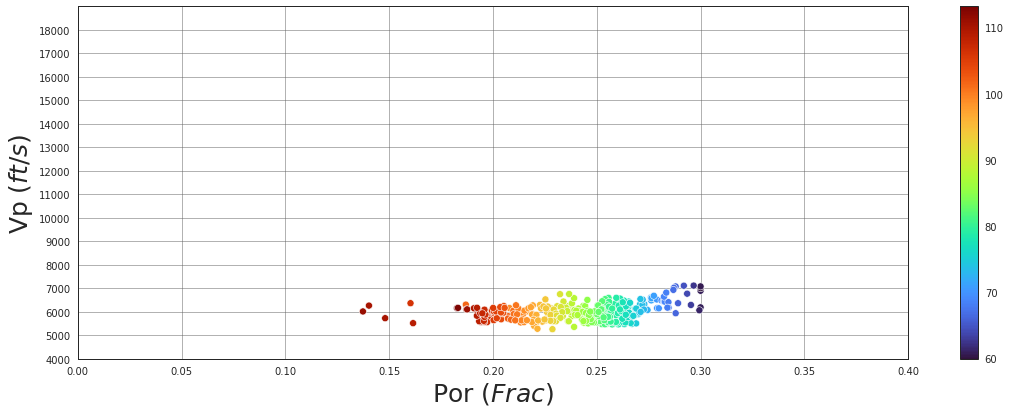

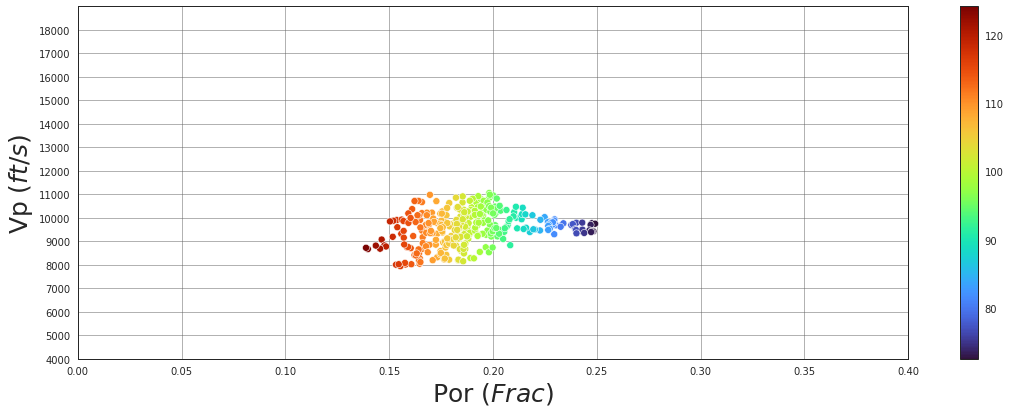

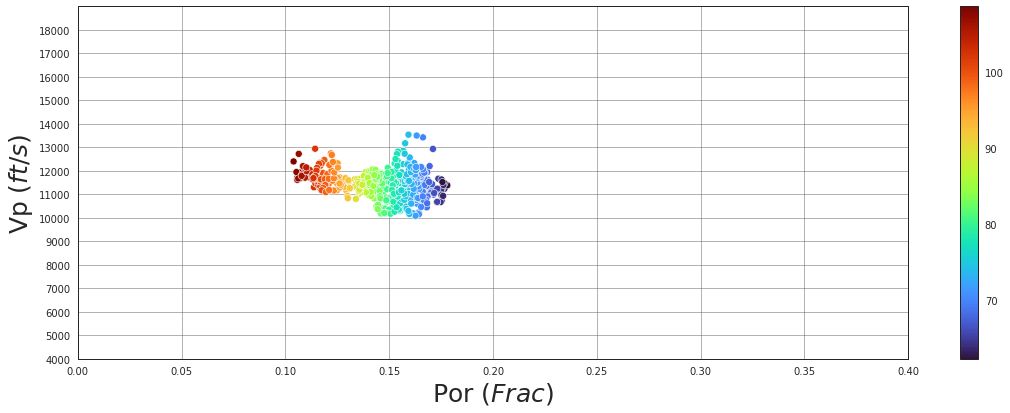

In [48]:
VpvsPHIT(dfRockPhys, 410, 450)
VpvsPHIT(dfRockPhys, 1160, 1200)
VpvsPHIT(dfRockPhys, 1830, 1970)

In [49]:
def VpvsPHITzone(dfInput, colorkey, z1upper, z1lower, z2upper, z2lower, z3upper, z3lower, cbarmin, cbarmax):
    
#     dfInput = dfInput[(dfInput.FACIES == 1)]
    
    dfInput = dfInput[(dfInput.GR_NORM < 100)]
    
    dataz1 = dfInput[(dfInput.DEPTH > z1upper) & (dfInput.DEPTH < z1lower)]
    dataz2 = dfInput[(dfInput.DEPTH > z2upper) & (dfInput.DEPTH < z2lower)]
    dataz3 = dfInput[(dfInput.DEPTH > z3upper) & (dfInput.DEPTH < z3lower)]
    
    data = pd.concat([dataz1, dataz2, dataz3])
    
    
    norm = plt.Normalize(data[colorkey].min(), data[colorkey].max())
    sm = plt.cm.ScalarMappable(cmap="turbo", norm=norm)
    sm.set_array([])
    
    ax = sns.relplot(x="PHIT", y="VP", hue=data[colorkey], data=data, palette='turbo', s= 15, legend = False);

    #border close
    sns.despine(top=False,    right=False,    left=False,    bottom=False)

    #adjust limit of graph
    ax.set(ylim=(4000, 19000), yticks=np.arange(4000, 19000, 1000))
    ax.set(xlim=(0, 0.4))


    #size of tick labels
    plt.rcParams.update({'font.size': 15})

    #adjust title size
    plt.xlabel('Por ($Frac$)', fontsize=25)
    plt.ylabel('Vp ($ft/s$)', fontsize=25)

    #adjust figure size
    ax.fig.set_figwidth(16)
    ax.fig.set_figheight(6)

    #for complete figure
    plt.tight_layout()

    #Setting ticks
    plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)
    
    ax.fig.colorbar(sm)

    plt.show()

#     plt.minorticks_on()
#     plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

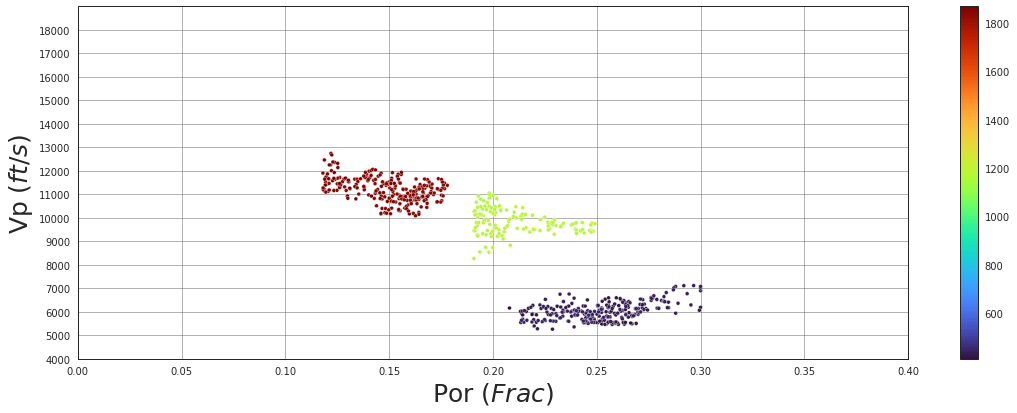

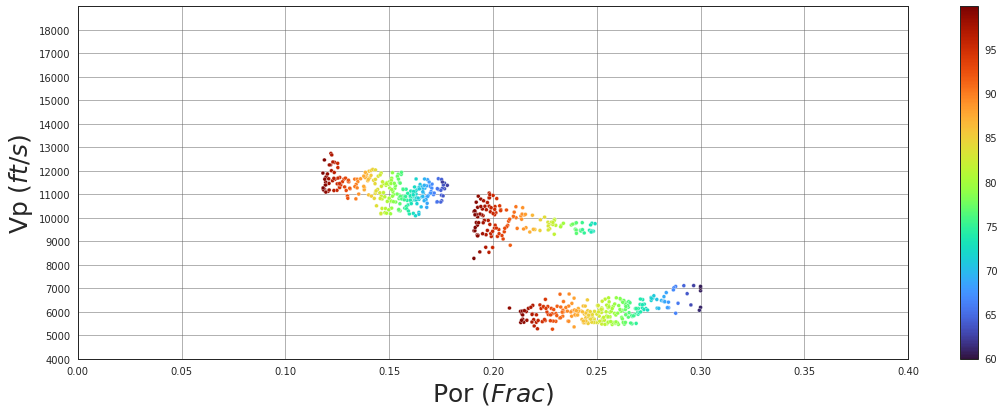

In [50]:
VpvsPHITzone(
             dfRockPhys,
             'DEPTH',
             410, 450,
             1160, 1200,
             1830, 1870,
             0,2000
            )

VpvsPHITzone(
             dfRockPhys,
             'GR_NORM',
             410, 450,
             1160, 1200,
             1830, 1870,
             0,150
            )


In [51]:
def VpvsPHITpred(dfInput, datafacies, facieslabel, z1upper, z1lower, z2upper, z2lower, z3upper, z3lower):
    
    dfInput['FACIES_RESULT'] = datafacies[facieslabel].values
    dfInput['FACIES_RESULT'] = dfInput['FACIES_RESULT'].astype(int)
    
    dfInput = dfInput[(dfInput.FACIES_RESULT < 4)]
    
    dfInput = dfInput[(dfInput.GR_NORM < 100)]
    
    dataz1 = dfInput[(dfInput.DEPTH > z1upper) & (dfInput.DEPTH < z1lower)]
    dataz2 = dfInput[(dfInput.DEPTH > z2upper) & (dfInput.DEPTH < z2lower)]
    dataz3 = dfInput[(dfInput.DEPTH > z3upper) & (dfInput.DEPTH < z3lower)]
    
    data = pd.concat([dataz1, dataz2, dataz3])
    
    plotFacies = ['#6E2C00', '#db6607', '#F4D03F']
    
    ax = sns.relplot(x="PHIT", y="VP", hue=data['FACIES_RESULT'], data=data, palette=plotFacies, s= 50, legend = False);

    #border close
    sns.despine(top=False,    right=False,    left=False,    bottom=False)

    #adjust limit of graph
    ax.set(ylim=(4000, 19000), yticks=np.arange(4000, 19000, 1000))
    ax.set(xlim=(0, 0.4))


    #size of tick labels
    plt.rcParams.update({'font.size': 15})

    #adjust title size
    plt.xlabel('Por ($Frac$)', fontsize=25)
    plt.ylabel('Vp ($ft/s$)', fontsize=25)

    #adjust figure size
    ax.fig.set_figwidth(16)
    ax.fig.set_figheight(6)

    #for complete figure
    plt.tight_layout()

    #Setting ticks
    plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha = 0.5)

#     plt.minorticks_on()
#     plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

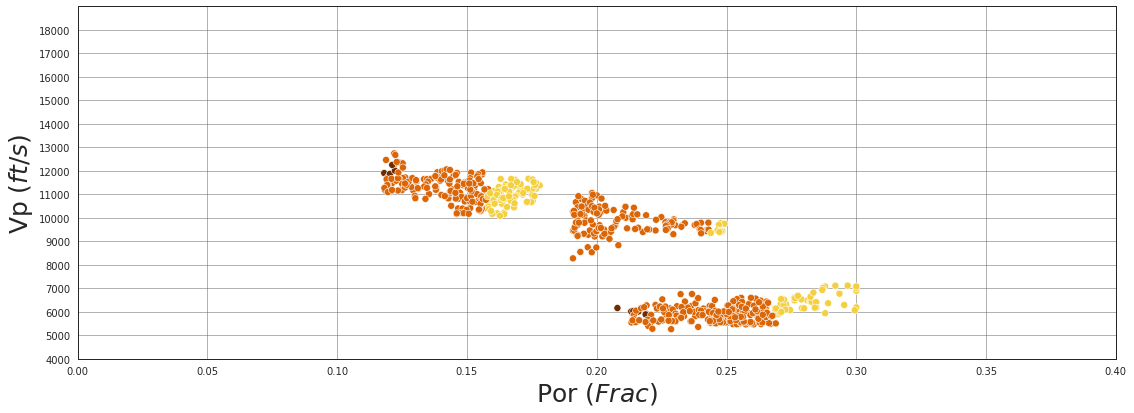

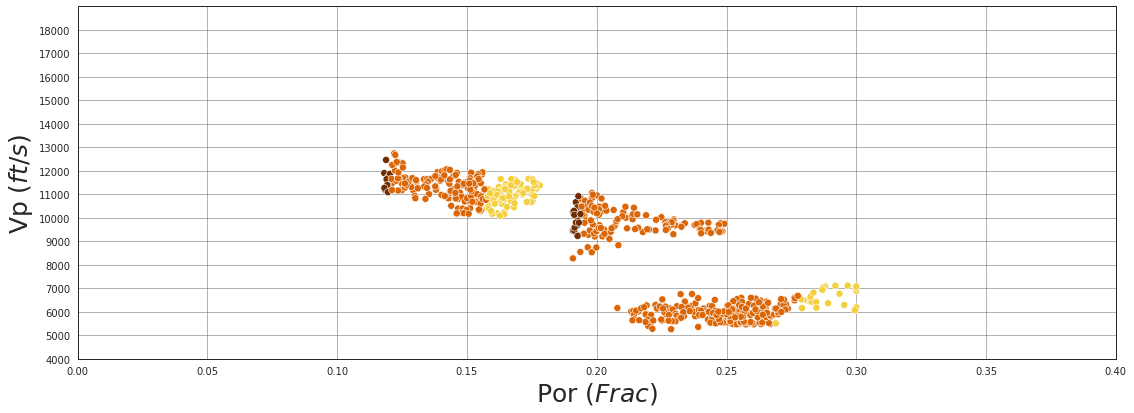

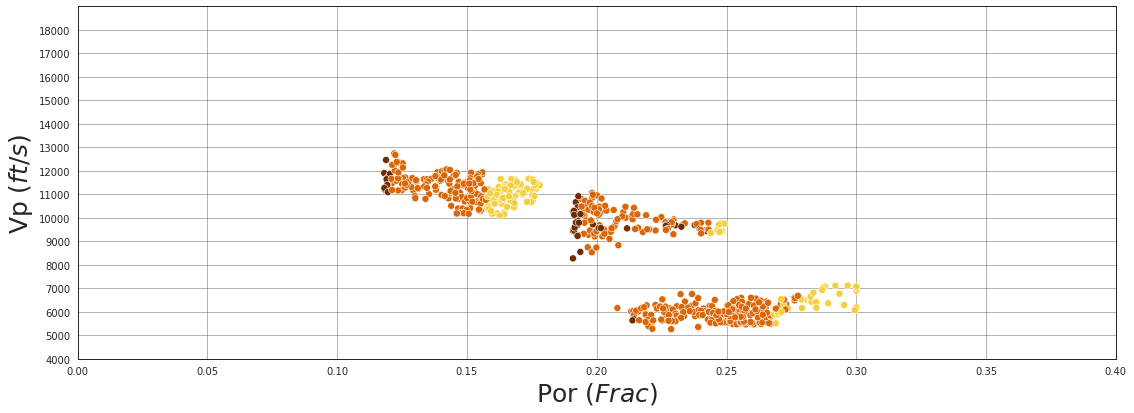

In [52]:
VpvsPHITpred(
             dfRockPhys,dfPredResult,'FACIES ORIGINAL',
             410, 450,
             1160, 1200,
             1830, 1870,
            )
plt.savefig('1original.png', dpi = 400)
VpvsPHITpred(
             dfRockPhys,dfPredResult,'RANDOM FOREST',
             410, 450,
             1160, 1200,
             1830, 1870,
            )
plt.savefig('2randomforest.png', dpi = 400)
VpvsPHITpred(
             dfRockPhys,dfPredResult,'GRADIENT BOOSTING',
             410, 450,
             1160, 1200,
             1830, 1870,
            )
plt.savefig('3gradientboost.png', dpi = 400)